In [ ]:
# @title Import Libraries & Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
plt.rcParams['figure.dpi'] = 300
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["figure.figsize"] = (4.5, 3.5)
!pip install category_encoders -q

from google.colab import drive
drive.mount('/content/drive')

# To ignore warnings
import warnings
warnings.simplefilter(action="ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **IMPORT DATASET**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PlayGolf?/archive/golf_dataset_wide_format.csv')
df.head()

Date  Weekday Month  Season  Holiday  Temperature  Humidity  Windy  \
0  2021-01-01        4   Jan  Winter        1          3.3      49.0      1   
1  2021-01-02        5   Jan  Winter        0          2.9      53.0      0   
2  2021-01-03        6   Jan  Winter        0          2.3      58.0      0   
3  2021-01-04        0   Jan  Winter        0          3.0      45.0      0   
4  2021-01-05        1   Jan  Winter        0          3.1      31.0      1   

    Outlook  Crowdedness  ...  Play_C  PlayTimeHour_C  Play_D  PlayTimeHour_D  \
0     sunny         0.73  ...       0             0.0       1             3.6   
1     sunny         0.74  ...       1             4.6       0             0.0   
2  overcast         0.70  ...       1             4.6       0             0.0   
3  overcast         0.61  ...       0             0.0       0             0.0   
4     sunny         0.52  ...       0             0.0       0             0.0   

   Play_E  PlayTimeHour_E  Play_F  PlayTimeHour_F  Play_G  PlayTimeHour_G  
0       1             3.4       0             0.0       0             0.0  
1       0             0.0       0             0.0       0             0.0  
2       0             0.0       0             0.0       0             0.0  
3       0             0.0       0             0.0       0             0.0  
4       1             2.8       0             0.0       0             0.0  

[5 rows x 24 columns]

In [ ]:
df.describe()

Weekday      Holiday  Temperature     Humidity        Windy  \
count  1095.000000  1095.000000  1095.000000  1095.000000  1095.000000   
mean      3.005479     0.044749    13.435525    61.525114     0.507763   
std       2.001363     0.206846     8.043321    14.435162     0.500168   
min       0.000000     0.000000    -2.000000    18.000000     0.000000   
25%       1.000000     0.000000     6.000000    52.000000     0.000000   
50%       3.000000     0.000000    13.800000    61.000000     1.000000   
75%       5.000000     0.000000    20.500000    72.000000     1.000000   
max       6.000000     1.000000    29.500000    99.000000     1.000000   

       Crowdedness       Play_A  PlayTimeHour_A       Play_B  PlayTimeHour_B  \
count  1095.000000  1095.000000     1095.000000  1095.000000     1095.000000   
mean      0.620721     0.209132        0.697534     0.223744        0.735068   
std       0.150474     0.406875        1.360793     0.416943        1.373047   
min       0.000000     0.000000        0.000000     0.000000        0.000000   
25%       0.530000     0.000000        0.000000     0.000000        0.000000   
50%       0.630000     0.000000        0.000000     0.000000        0.000000   
75%       0.720000     0.000000        0.000000     0.000000        0.000000   
max       1.000000     1.000000        4.100000     1.000000        3.900000   

            Play_C  PlayTimeHour_C       Play_D  PlayTimeHour_D       Play_E  \
count  1095.000000     1095.000000  1095.000000     1095.000000  1095.000000   
mean      0.233790        1.084110     0.189954        0.640913     0.257534   
std       0.423434        1.965433     0.392444        1.328057     0.437476   
min       0.000000        0.000000     0.000000        0.000000     0.000000   
25%       0.000000        0.000000     0.000000        0.000000     0.000000   
50%       0.000000        0.000000     0.000000        0.000000     0.000000   
75%       0.000000        0.000000     0.000000        0.000000     1.000000   
max       1.000000        5.200000     1.000000        4.200000     1.000000   

       PlayTimeHour_E       Play_F  PlayTimeHour_F       Play_G  \
count     1095.000000  1095.000000     1095.000000  1095.000000   
mean         0.789863     0.060274        0.199543     0.103196   
std          1.347045     0.238102        0.790188     0.304354   
min          0.000000     0.000000        0.000000     0.000000   
25%          0.000000     0.000000        0.000000     0.000000   
50%          0.000000     0.000000        0.000000     0.000000   
75%          2.800000     0.000000        0.000000     0.000000   
max          4.000000     1.000000        3.900000     1.000000   

       PlayTimeHour_G  
count     1095.000000  
mean         0.347215  
std          1.026918  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          4.200000

In [ ]:
# Check the shape of the dataset (number of rows and columns)
print('Shape of the Dataset =', df.shape)

# Get the list of column names
columns = df.columns.values.tolist()

# Print the column names
print('\nList of Column Names:', columns)

# Get general information about the dataset (data types, non-null counts, memory usage, etc.)
df.info()

# Get descriptive statistics of the dataset (count, mean, std, min, 25%, 50%, 75%, max)
df.describe()

# Get data types of each column
data_types = df.dtypes

# Print the data types of each column
print('\nData Types of Each Column:')
print(data_types)

Shape of the Dataset = (1095, 24)

List of Column Names: ['Date', 'Weekday', 'Month', 'Season', 'Holiday', 'Temperature', 'Humidity', 'Windy', 'Outlook', 'Crowdedness', 'Play_A', 'PlayTimeHour_A', 'Play_B', 'PlayTimeHour_B', 'Play_C', 'PlayTimeHour_C', 'Play_D', 'PlayTimeHour_D', 'Play_E', 'PlayTimeHour_E', 'Play_F', 'PlayTimeHour_F', 'Play_G', 'PlayTimeHour_G']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1095 non-null   object 
 1   Weekday         1095 non-null   int64  
 2   Month           1095 non-null   object 
 3   Season          1095 non-null   object 
 4   Holiday         1095 non-null   int64  
 5   Temperature     1095 non-null   float64
 6   Humidity        1095 non-null   float64
 7   Windy           1095 non-null   int64  
 8   Outlook         1095 non-null   object 
 9   Crowdedness     1095 non-nul

In [ ]:
# Menghitung jumlah pemain yang memutuskan untuk bermain pada hari tersebut
df['Total_Players_Playing'] = df[['Play_A', 'Play_B', 'Play_C', 'Play_D', 'Play_E', 'Play_F', 'Play_G']].sum(axis=1)

# Menentukan apakah banyak pemain yang memutuskan untuk bermain atau tidak
threshold = 1  # Jumlah pemain yang dianggap "banyak"
df['Many_Players_Playing'] = df['Total_Players_Playing'] >= threshold

In [ ]:
# Membuat kolom baru untuk PlayTime rata-rata hanya dari pemain yang bermain
play_columns = ['PlayTimeHour_A', 'PlayTimeHour_B', 'PlayTimeHour_C', 'PlayTimeHour_D', 'PlayTimeHour_E', 'PlayTimeHour_F', 'PlayTimeHour_G']

# Menghitung rata-rata PlayTime hanya dari pemain yang bermain pada hari itu (Play=1)
df['Average_PlayTime'] = df.apply(lambda row: row[play_columns][row[play_columns] != 0].mean(), axis=1)


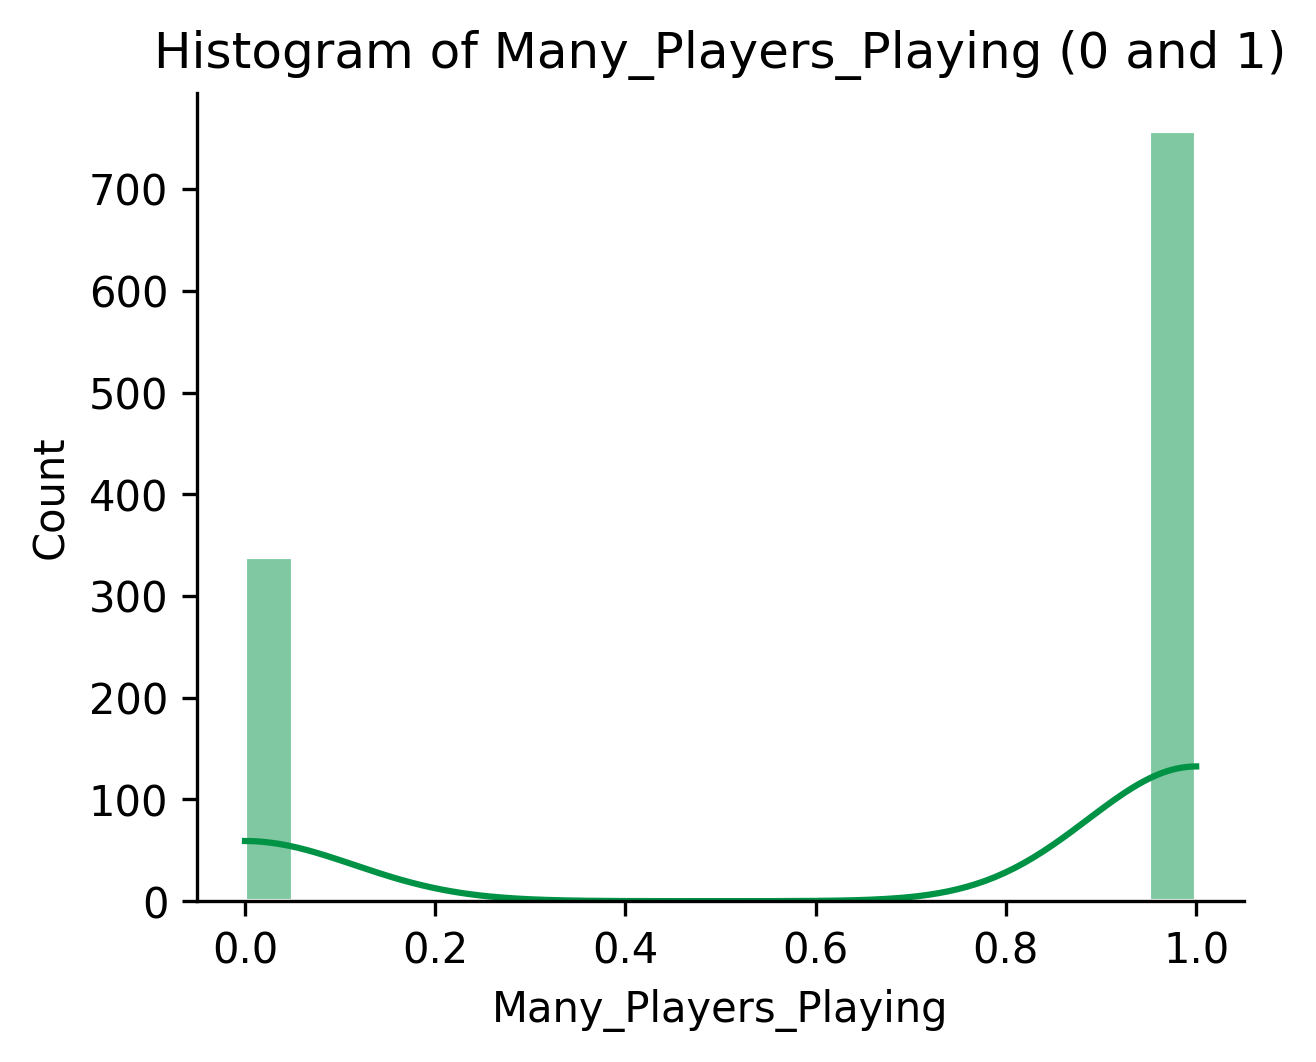

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot((df['Many_Players_Playing']).astype(int), bins=20, kde=True, color="#009245", edgecolor="white")
plt.xlabel("Many_Players_Playing")
plt.ylabel("Count")
plt.title("Histogram of Many_Players_Playing (0 and 1)")
plt.show()


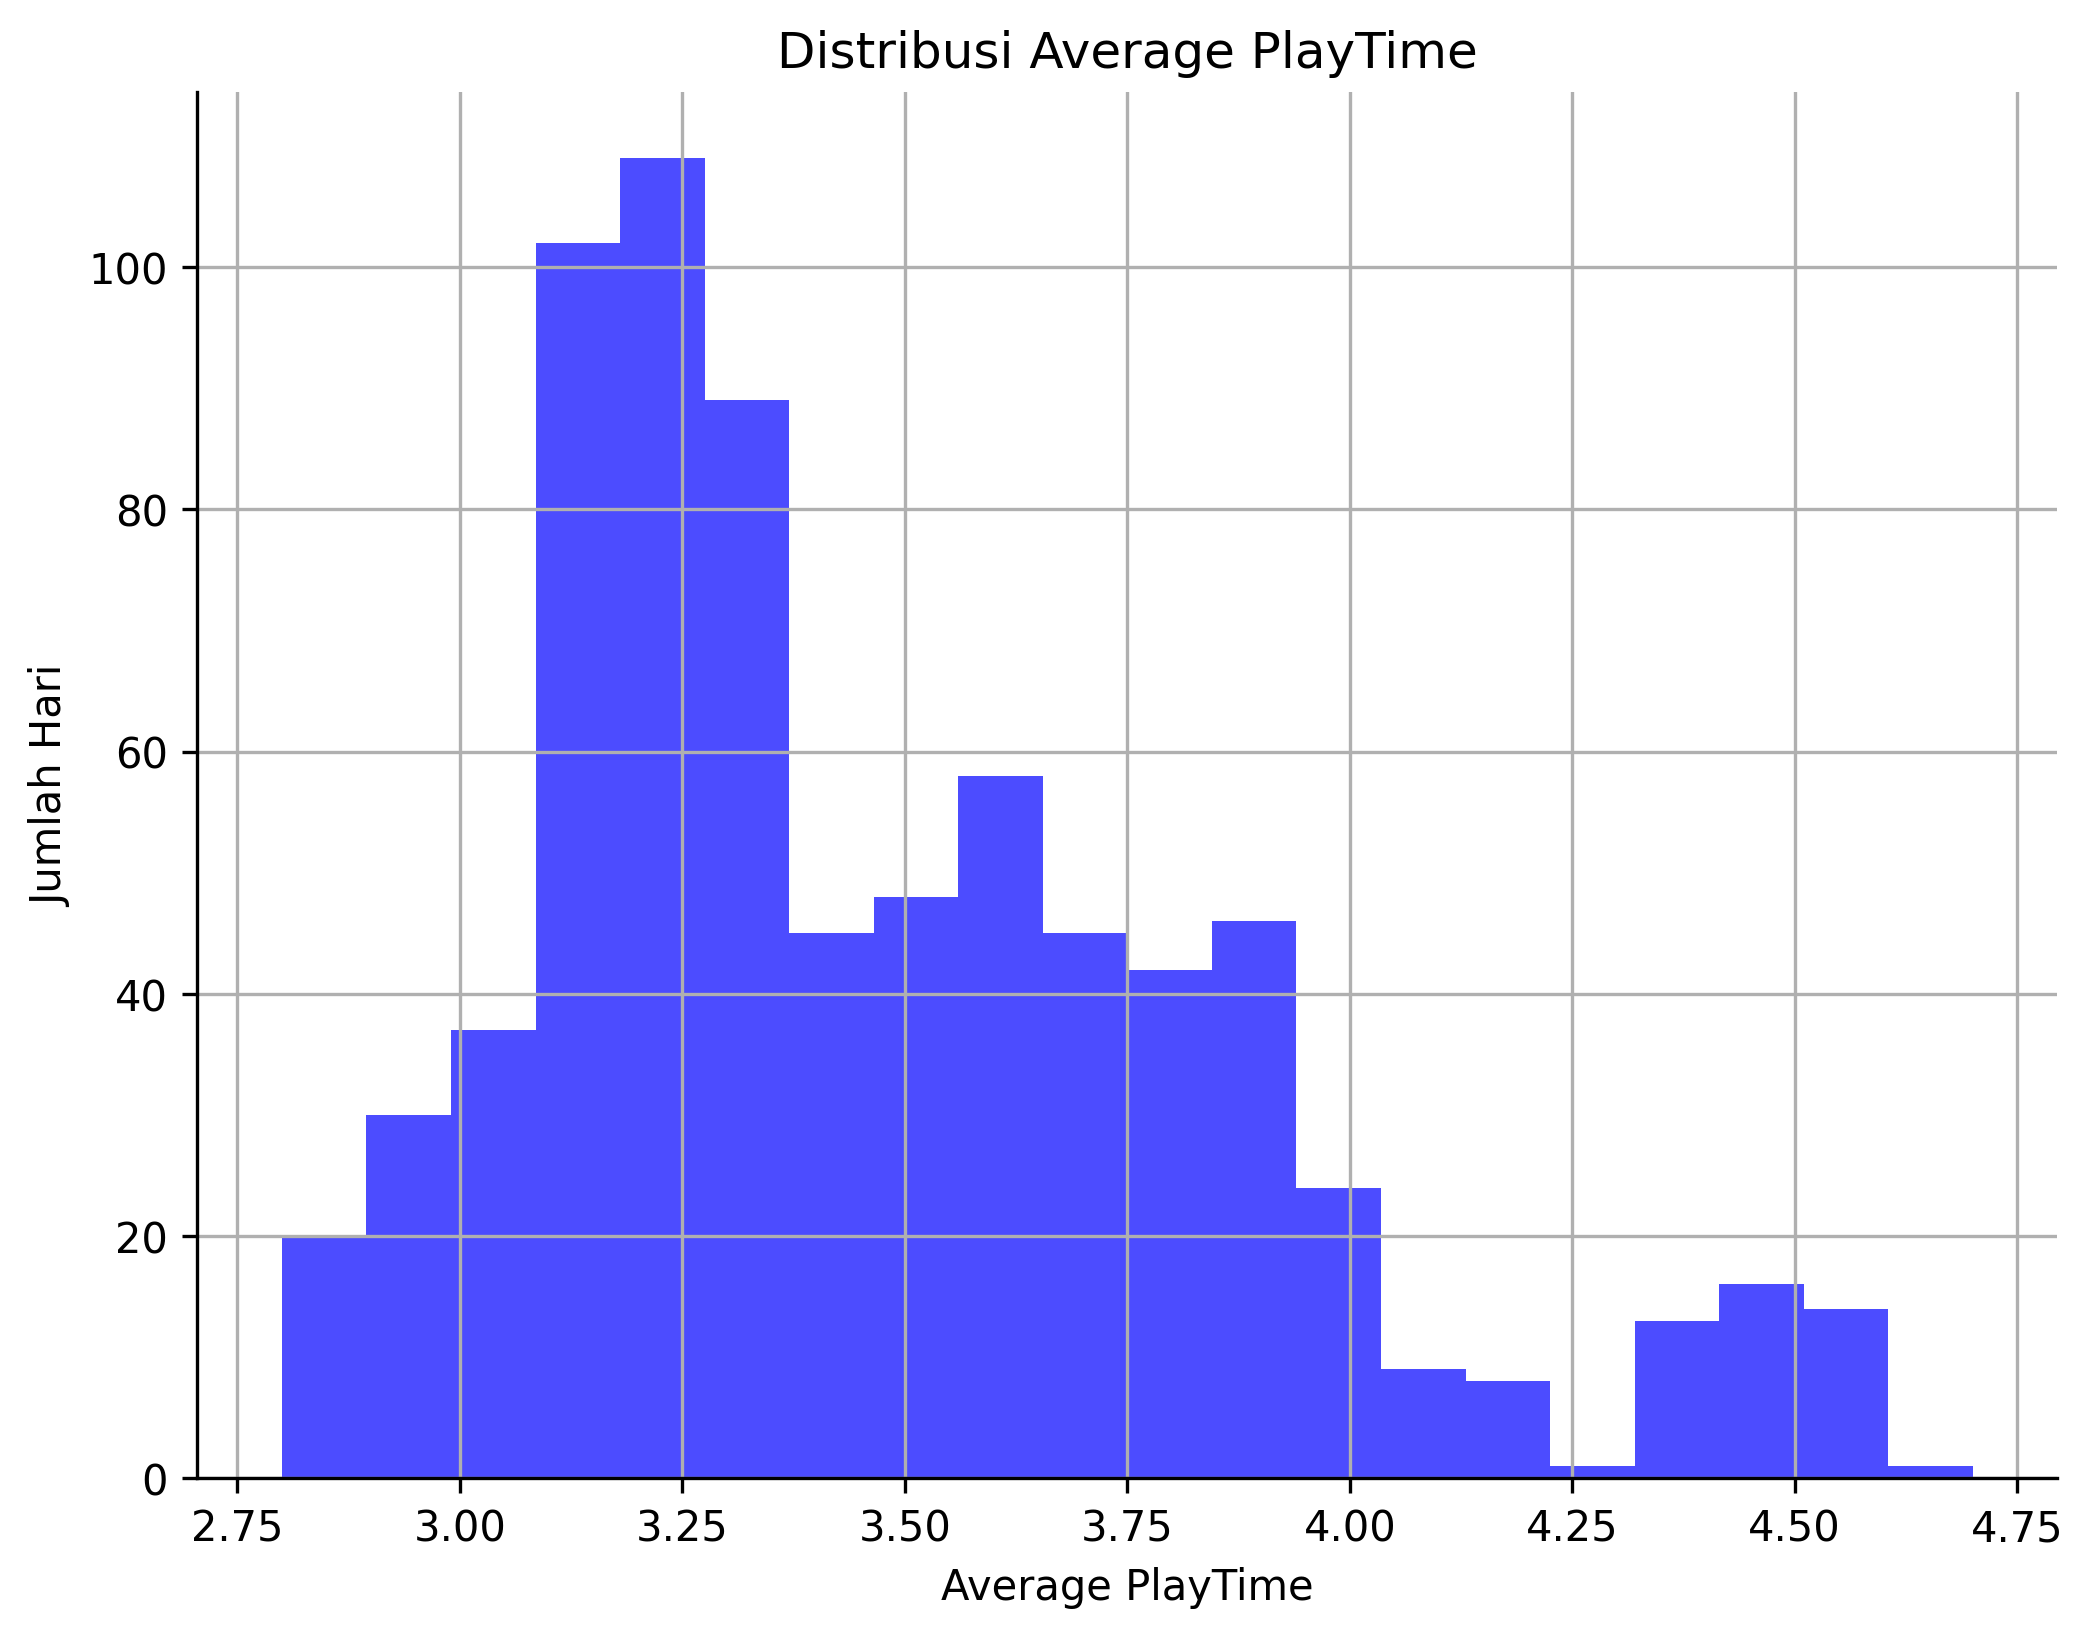

In [ ]:
# Membuat histogram distribusi Average_PlayTime
plt.figure(figsize=(8, 6))
plt.hist(df['Average_PlayTime'], bins=20, color='blue', alpha=0.7)
plt.title('Distribusi Average PlayTime')
plt.xlabel('Average PlayTime')
plt.ylabel('Jumlah Hari')
plt.grid(True)

# Menampilkan plot
plt.show()

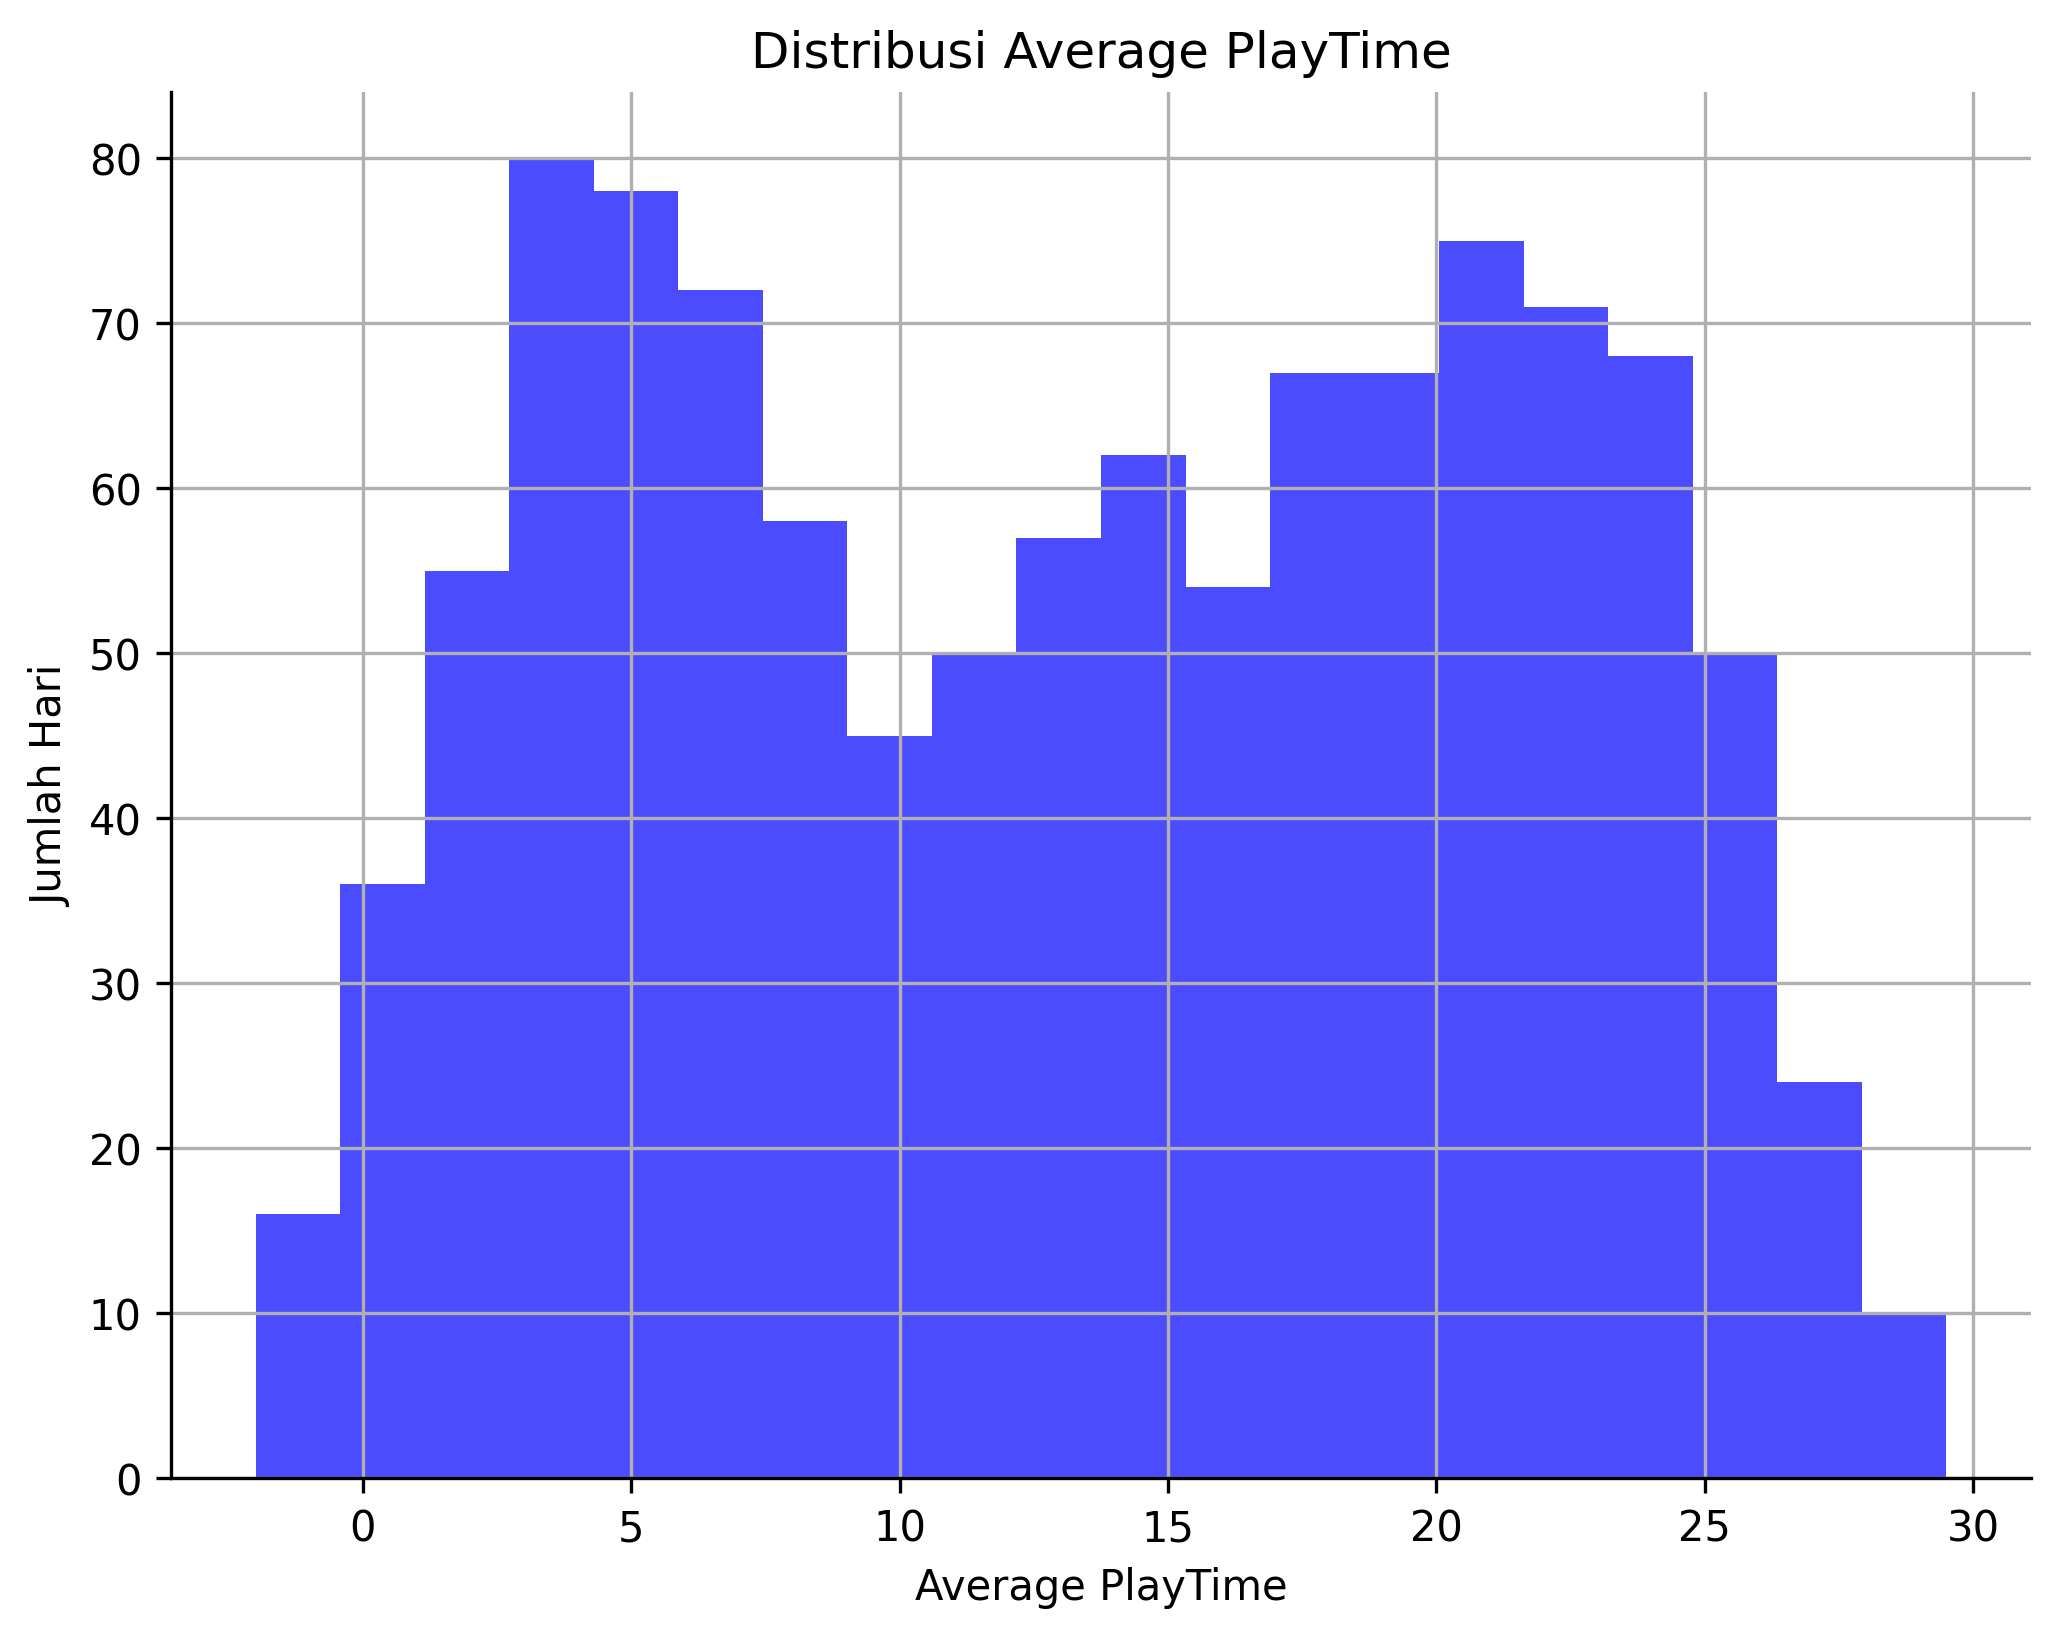

In [ ]:
# Membuat histogram distribusi Temperature
plt.figure(figsize=(8, 6))
plt.hist(df['Temperature'], bins=20, color='blue', alpha=0.7)
plt.title('Distribusi Average PlayTime')
plt.xlabel('Average PlayTime')
plt.ylabel('Jumlah Hari')
plt.grid(True)

# Menampilkan plot
plt.show()

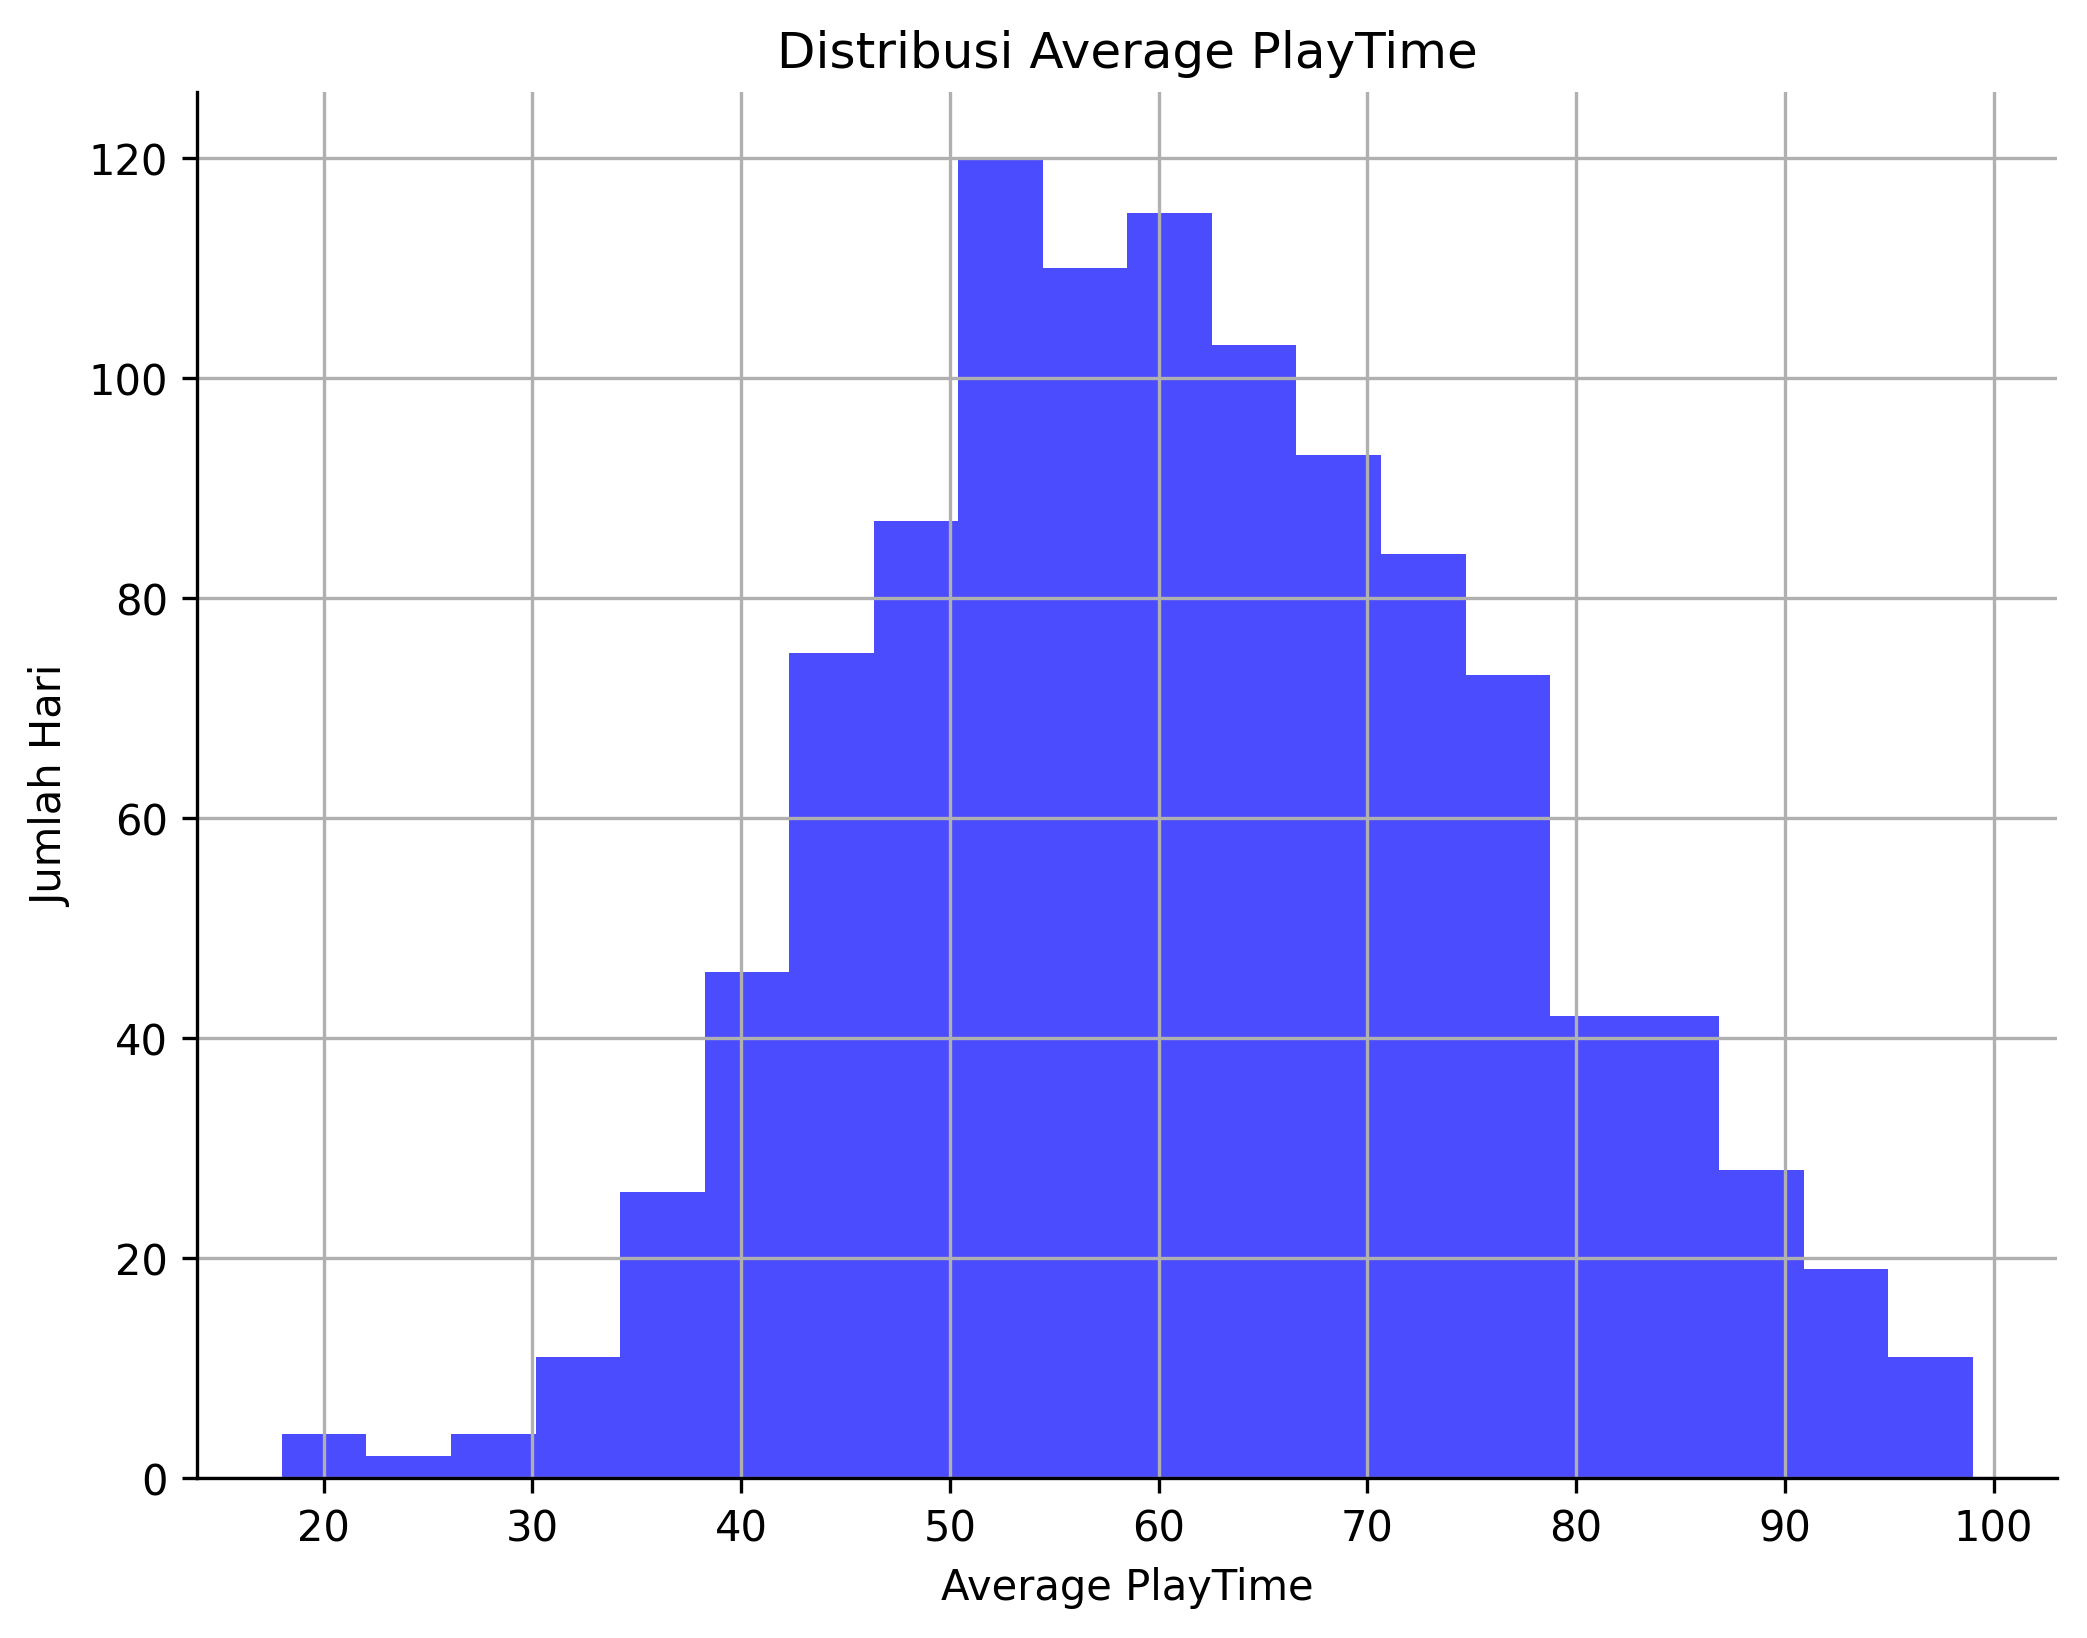

In [ ]:
# Membuat histogram distribusi Humidity
plt.figure(figsize=(8, 6))
plt.hist(df['Humidity'], bins=20, color='blue', alpha=0.7)
plt.title('Distribusi Average PlayTime')
plt.xlabel('Average PlayTime')
plt.ylabel('Jumlah Hari')
plt.grid(True)

# Menampilkan plot
plt.show()

In [ ]:
Q1 = df[['Temperature', 'Humidity']].quantile(0.25)
Q2 = df[['Temperature', 'Humidity']].quantile(0.5)
Q3 = df[['Temperature', 'Humidity']].quantile(0.75)

pd.DataFrame({'Q1': Q1, 'Q2': Q2, 'Q3': Q3}).T

Temperature  Humidity
Q1          6.0      52.0
Q2         13.8      61.0
Q3         20.5      72.0

In [ ]:
# Menggunakan metode value_counts() untuk menghitung variasi dan totalnya dalam kolom "Play"
play_variety_counts = df['Total_Players_Playing'].value_counts()

# Menampilkan variasi dan totalnya dalam kolom "Play"
print("Variasi dan Total dalam Kolom 'Play':")
print(play_variety_counts)

Variasi dan Total dalam Kolom 'Play':
1    368
0    338
2    213
3    121
4     35
5     18
6      2
Name: Total_Players_Playing, dtype: int64


In [ ]:
# Menggunakan metode value_counts() untuk menghitung variasi dan totalnya dalam kolom "Play"
play_variety_counts = df['Many_Players_Playing'].value_counts()

# Menampilkan variasi dan totalnya dalam kolom "Play"
print("Variasi dan Total dalam Kolom 'Play':")
print(play_variety_counts)

Variasi dan Total dalam Kolom 'Play':
True     757
False    338
Name: Many_Players_Playing, dtype: int64


In [ ]:
# Menampilkan baris dengan 'Many_Players_Playing' bernilai True
#rows_with_true = df[df['Many_Players_Playing'] == True]
#print(rows_with_true)

In [ ]:
df.columns

Index(['Date', 'Weekday', 'Month', 'Season', 'Holiday', 'Temperature',
       'Humidity', 'Windy', 'Outlook', 'Crowdedness', 'Play_A',
       'PlayTimeHour_A', 'Play_B', 'PlayTimeHour_B', 'Play_C',
       'PlayTimeHour_C', 'Play_D', 'PlayTimeHour_D', 'Play_E',
       'PlayTimeHour_E', 'Play_F', 'PlayTimeHour_F', 'Play_G',
       'PlayTimeHour_G', 'Total_Players_Playing', 'Many_Players_Playing',
       'Average_PlayTime'],
      dtype='object')

In [ ]:
# Menghapus kolom-kolom yang tidak diperlukan
df = df.drop(['Play_A', 'PlayTimeHour_A', 'Play_B', 'PlayTimeHour_B', 'Play_C',
              'PlayTimeHour_C', 'Play_D', 'PlayTimeHour_D', 'Play_E', 'PlayTimeHour_E',
              'Play_F', 'PlayTimeHour_F', 'Play_G', 'PlayTimeHour_G','Total_Players_Playing'], axis=1)

In [ ]:
df.head()

Date  Weekday Month  Season  Holiday  Temperature  Humidity  Windy  \
0  2021-01-01        4   Jan  Winter        1          3.3      49.0      1   
1  2021-01-02        5   Jan  Winter        0          2.9      53.0      0   
2  2021-01-03        6   Jan  Winter        0          2.3      58.0      0   
3  2021-01-04        0   Jan  Winter        0          3.0      45.0      0   
4  2021-01-05        1   Jan  Winter        0          3.1      31.0      1   

    Outlook  Crowdedness  Many_Players_Playing  Average_PlayTime  
0     sunny         0.73                  True          3.366667  
1     sunny         0.74                  True          3.950000  
2  overcast         0.70                  True          4.600000  
3  overcast         0.61                 False               NaN  
4     sunny         0.52                  True          2.800000

In [ ]:
print(df)

            Date  Weekday Month  Season  Holiday  Temperature  Humidity  \
0     2021-01-01        4   Jan  Winter        1          3.3      49.0   
1     2021-01-02        5   Jan  Winter        0          2.9      53.0   
2     2021-01-03        6   Jan  Winter        0          2.3      58.0   
3     2021-01-04        0   Jan  Winter        0          3.0      45.0   
4     2021-01-05        1   Jan  Winter        0          3.1      31.0   
...          ...      ...   ...     ...      ...          ...       ...   
1090  2023-12-27        2   Dec  Winter        0          7.1      48.0   
1091  2023-12-28        3   Dec  Winter        0          6.6      55.0   
1092  2023-12-29        4   Dec  Winter        0          6.3      30.0   
1093  2023-12-30        5   Dec  Winter        0          4.3      54.0   
1094  2023-12-31        6   Dec  Winter        0          1.8      43.0   

      Windy   Outlook  Crowdedness  Many_Players_Playing  Average_PlayTime  
0         1     sunny 

# **MISSING & OUTLIER VALUE**

In [ ]:
df[['Humidity']]

Humidity
0         49.0
1         53.0
2         58.0
3         45.0
4         31.0
...        ...
1090      48.0
1091      55.0
1092      30.0
1093      54.0
1094      43.0

[1095 rows x 1 columns]

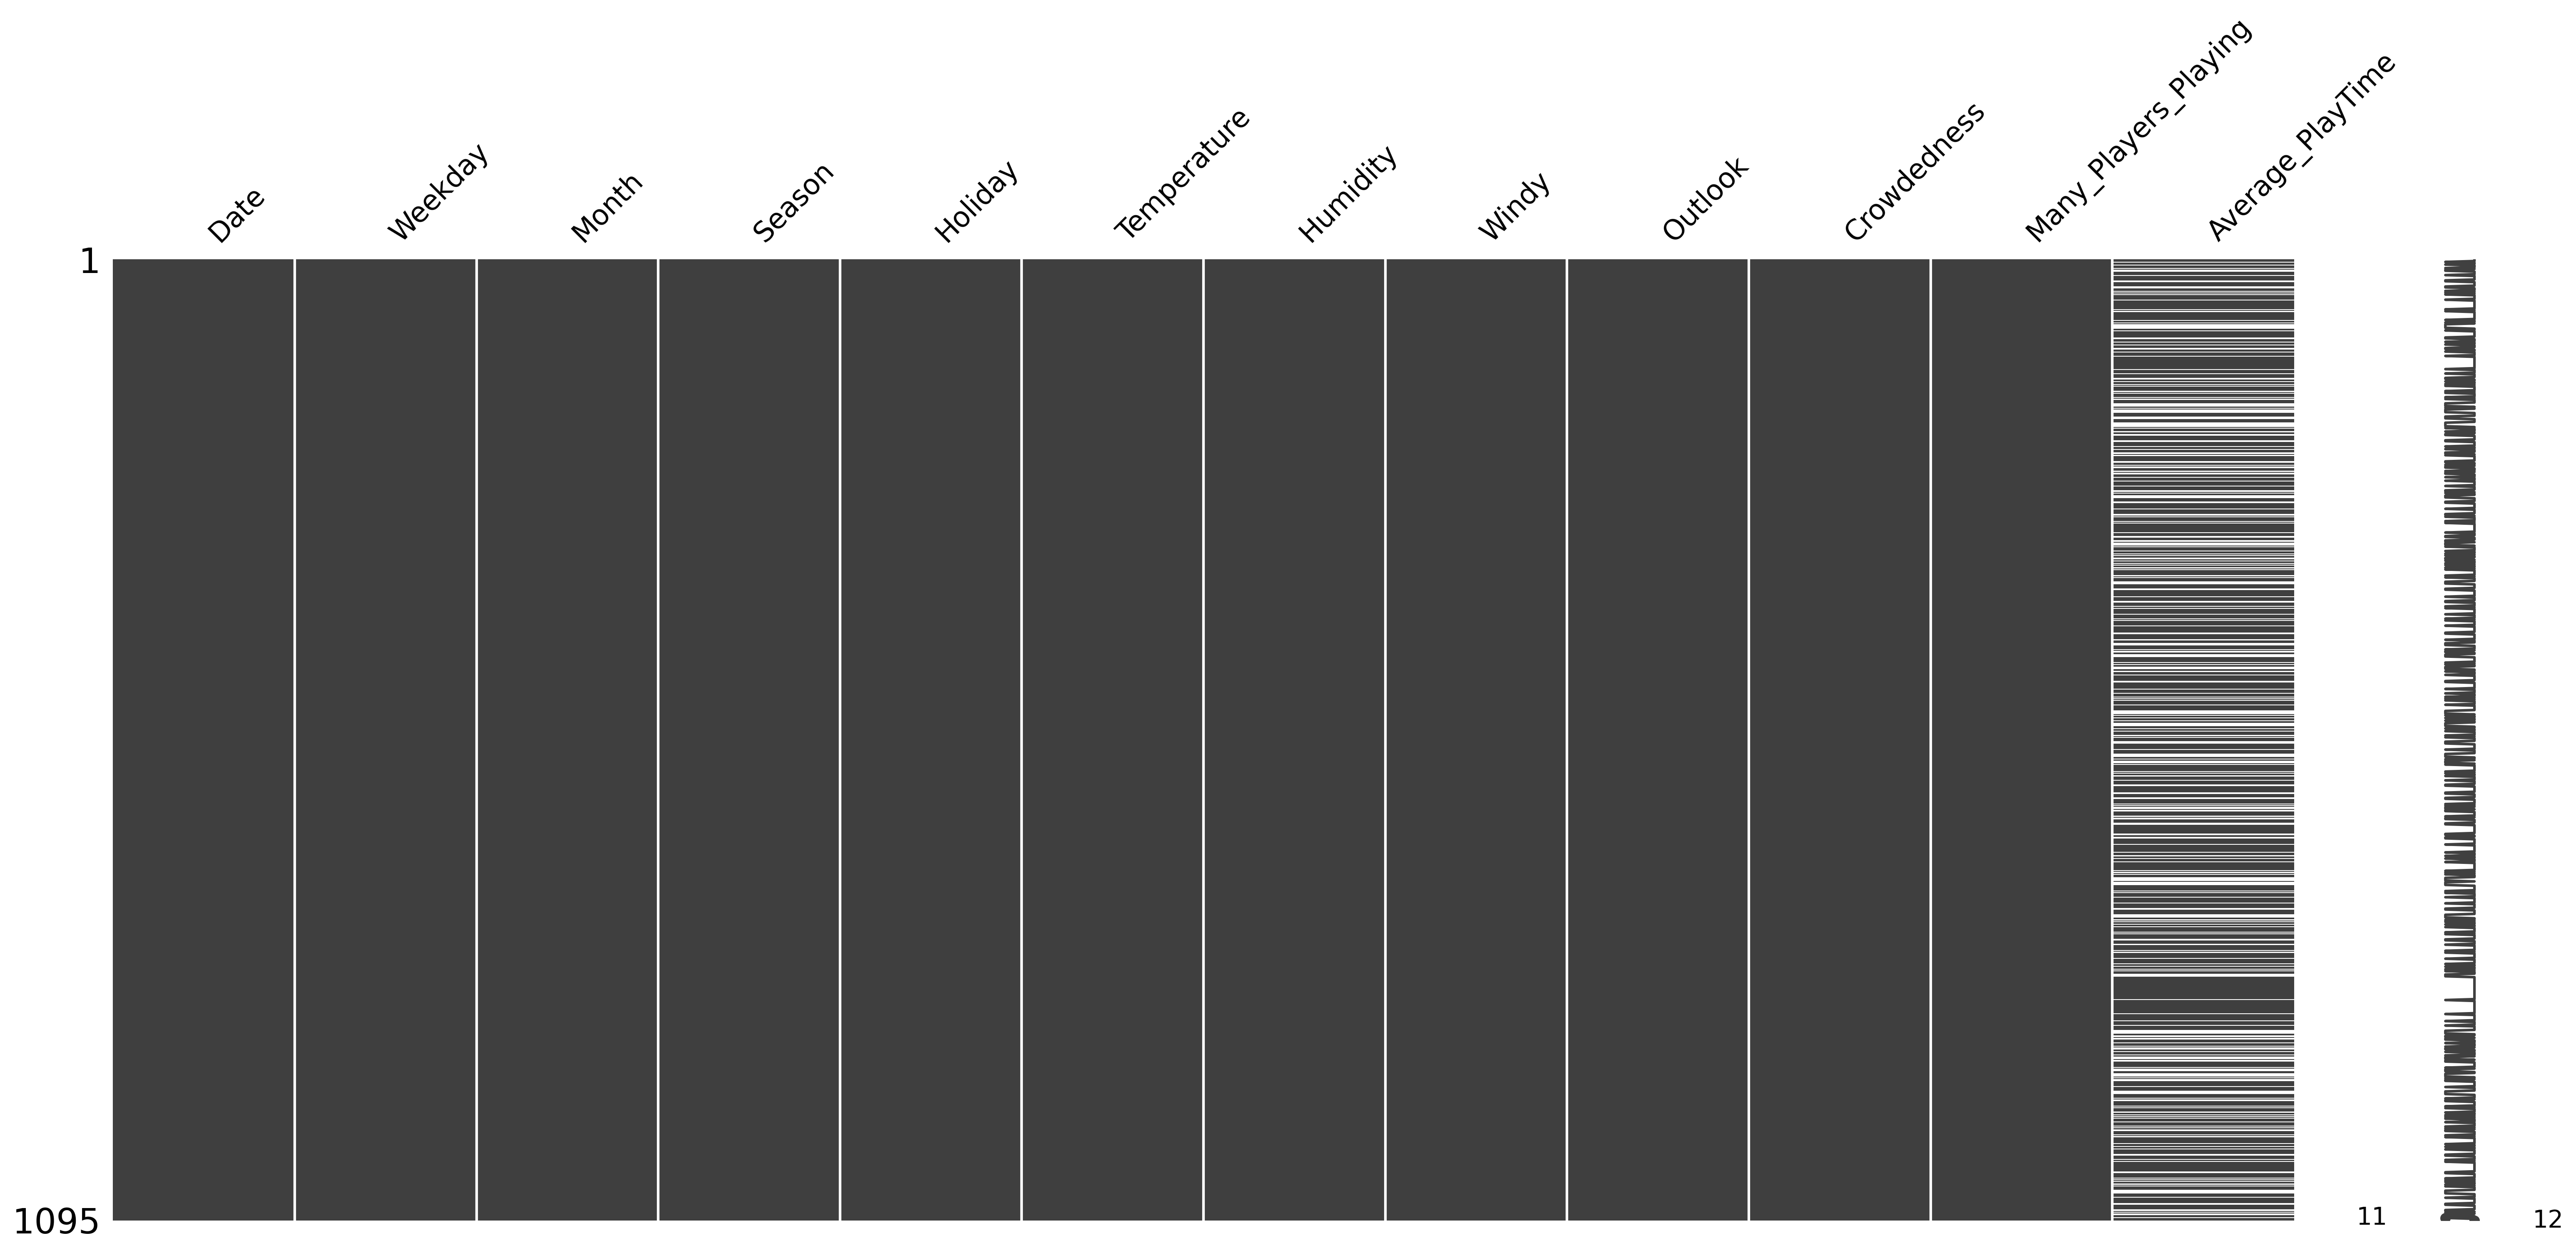

In [ ]:
import missingno as msno
msno.matrix(df)
plt.show()

In [ ]:
df.isnull().sum()

Date                      0
Weekday                   0
Month                     0
Season                    0
Holiday                   0
Temperature               0
Humidity                  0
Windy                     0
Outlook                   0
Crowdedness               0
Many_Players_Playing      0
Average_PlayTime        338
dtype: int64

In [ ]:
df['Average_PlayTime'].fillna(0, inplace=True)

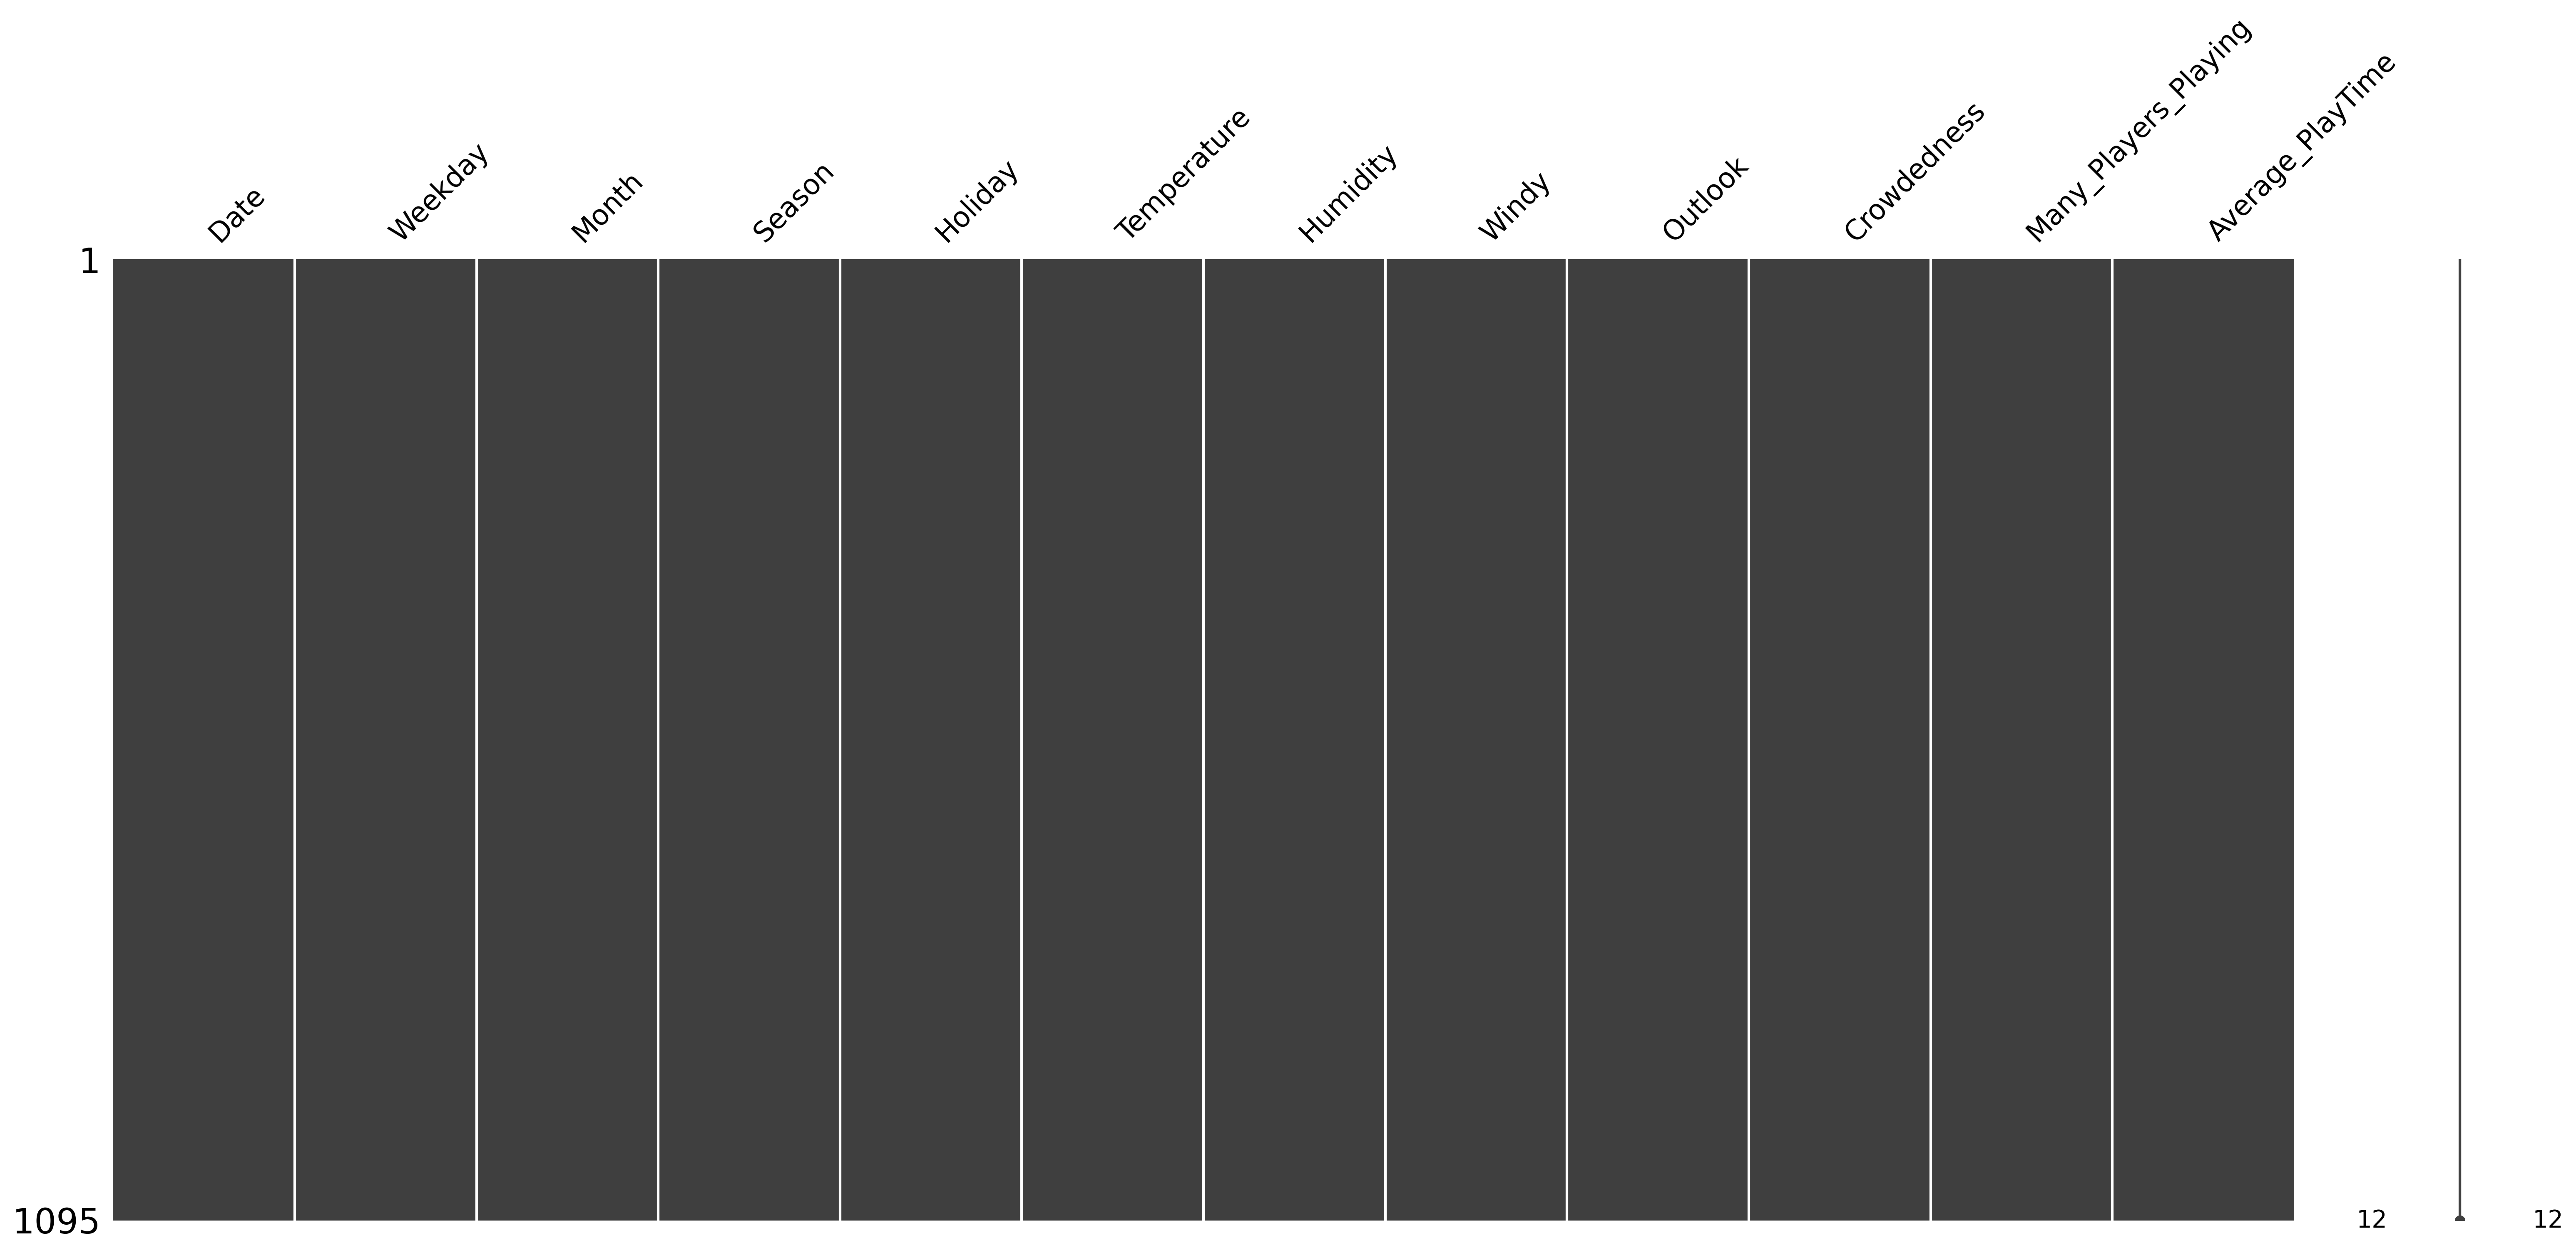

In [ ]:
import missingno as msno
msno.matrix(df)
plt.show()

In [ ]:
from scipy.stats import zscore
import pandas as pd
import numpy as np

# Calculate z-scores for 'Humidity'
df['Humidity_zscore'] = zscore(df.loc[:,'Humidity'])

# Identify outliers
outliers = df[np.abs(df['Humidity_zscore']) > 3]

# Replace outliers with the average 'Humidity' for the respective 'Outlook'
for index, row in outliers.iterrows():
    outlook = row['Outlook']
    avg_humidity_for_outlook = df[df['Outlook'] == outlook]['Humidity'].mean()
    df.loc[index, 'Humidity'] = avg_humidity_for_outlook

# Drop the 'Humidity_zscore' column as it's no longer needed
df.drop(['Humidity_zscore'], axis=1, inplace=True)

df[['Humidity']]

Humidity
0         49.0
1         53.0
2         58.0
3         45.0
4         31.0
...        ...
1090      48.0
1091      55.0
1092      30.0
1093      54.0
1094      43.0

[1095 rows x 1 columns]

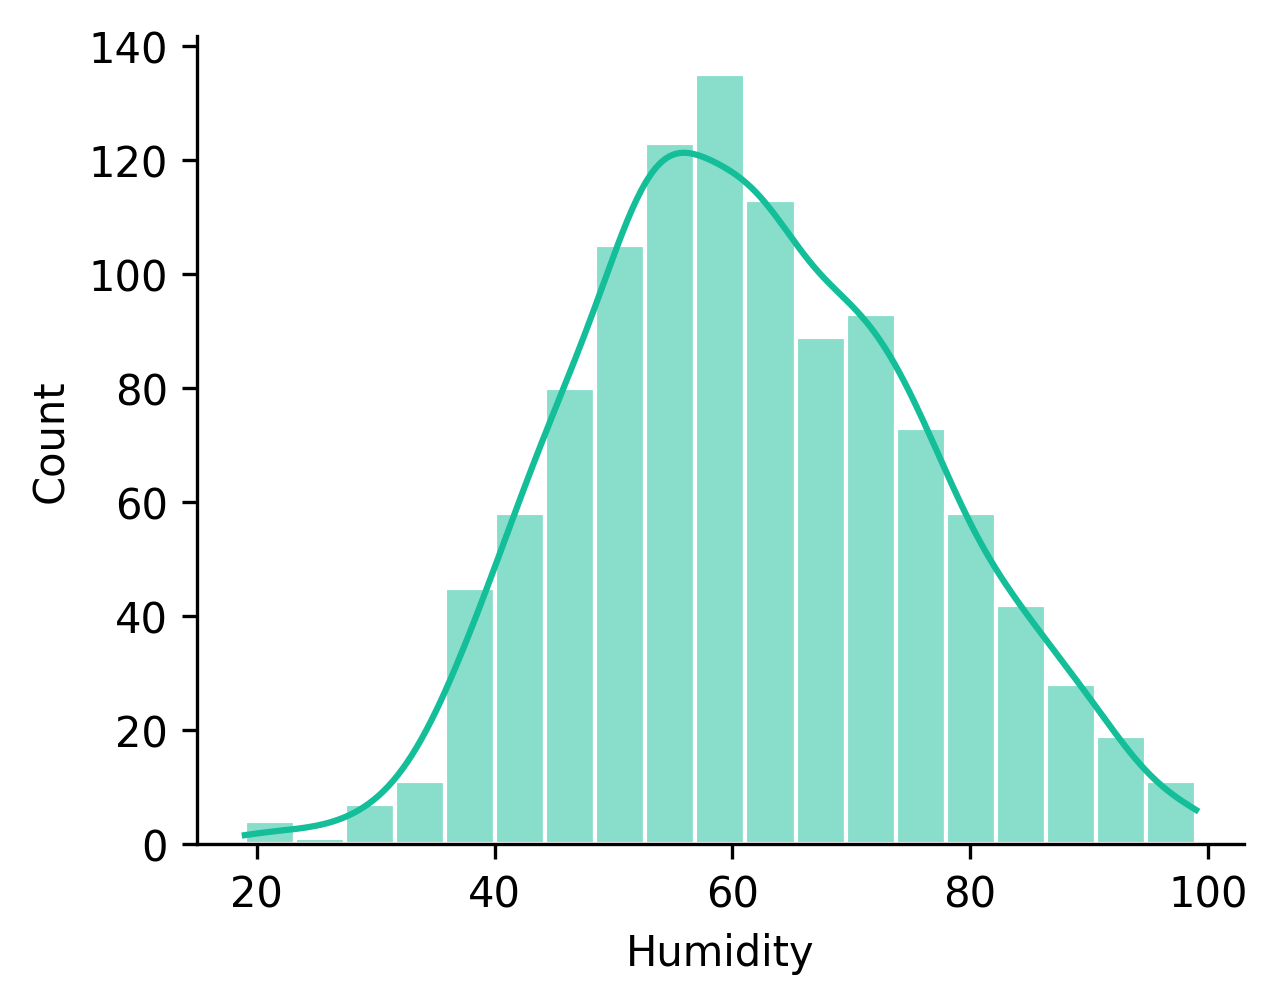

In [ ]:
sns.histplot(df['Humidity'], bins=19, kde=True, color="#13be99", edgecolor="white")
plt.show()

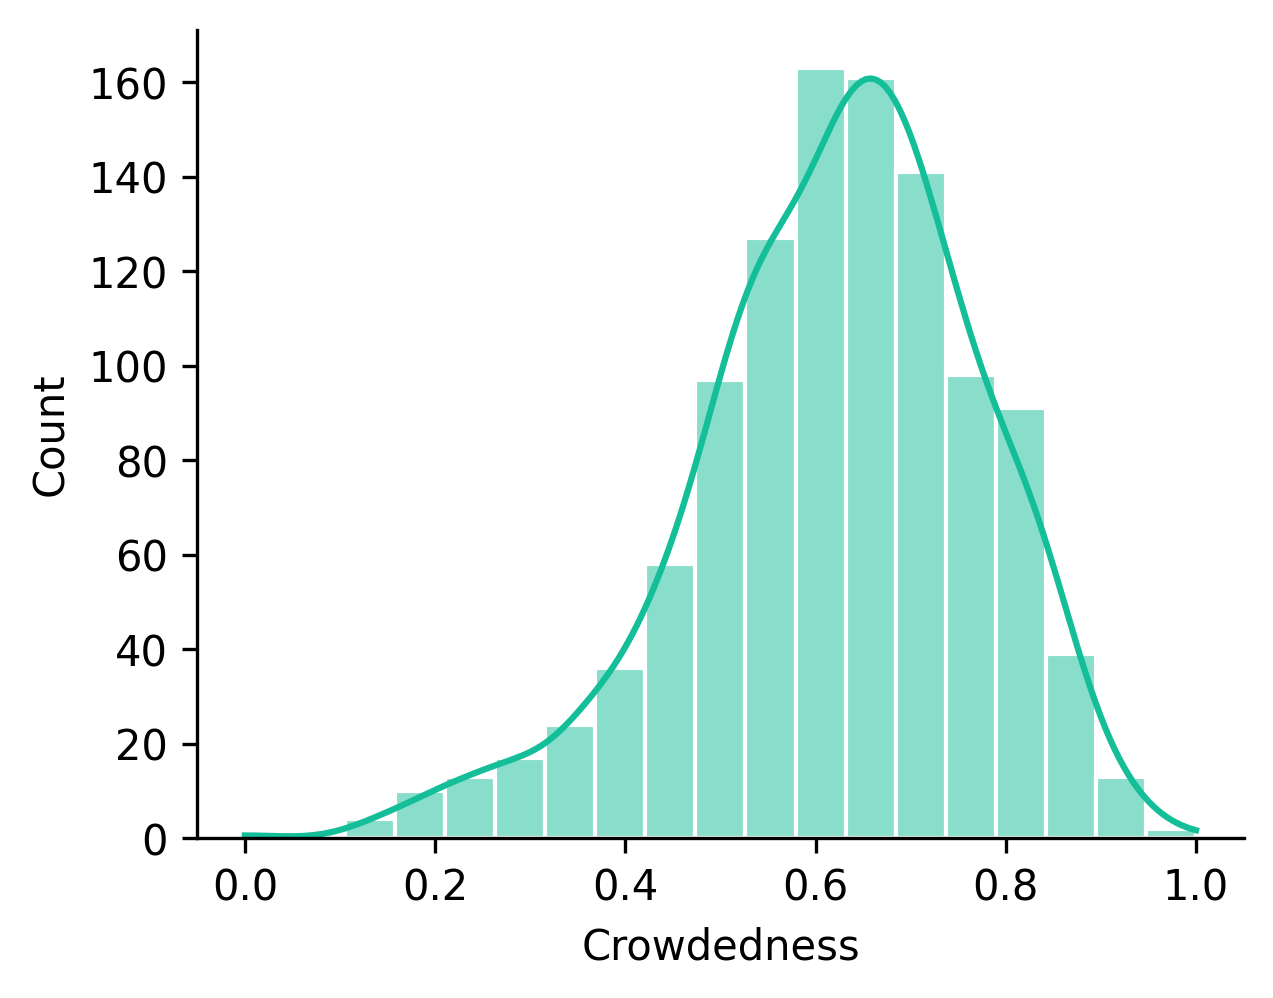

In [ ]:
sns.histplot(df['Crowdedness'], bins=19, kde=True, color="#13be99", edgecolor="white")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1095 non-null   object 
 1   Weekday               1095 non-null   int64  
 2   Month                 1095 non-null   object 
 3   Season                1095 non-null   object 
 4   Holiday               1095 non-null   int64  
 5   Temperature           1095 non-null   float64
 6   Humidity              1095 non-null   float64
 7   Windy                 1095 non-null   int64  
 8   Outlook               1095 non-null   object 
 9   Crowdedness           1095 non-null   float64
 10  Many_Players_Playing  1095 non-null   bool   
 11  Average_PlayTime      1095 non-null   float64
dtypes: bool(1), float64(4), int64(3), object(4)
memory usage: 95.3+ KB


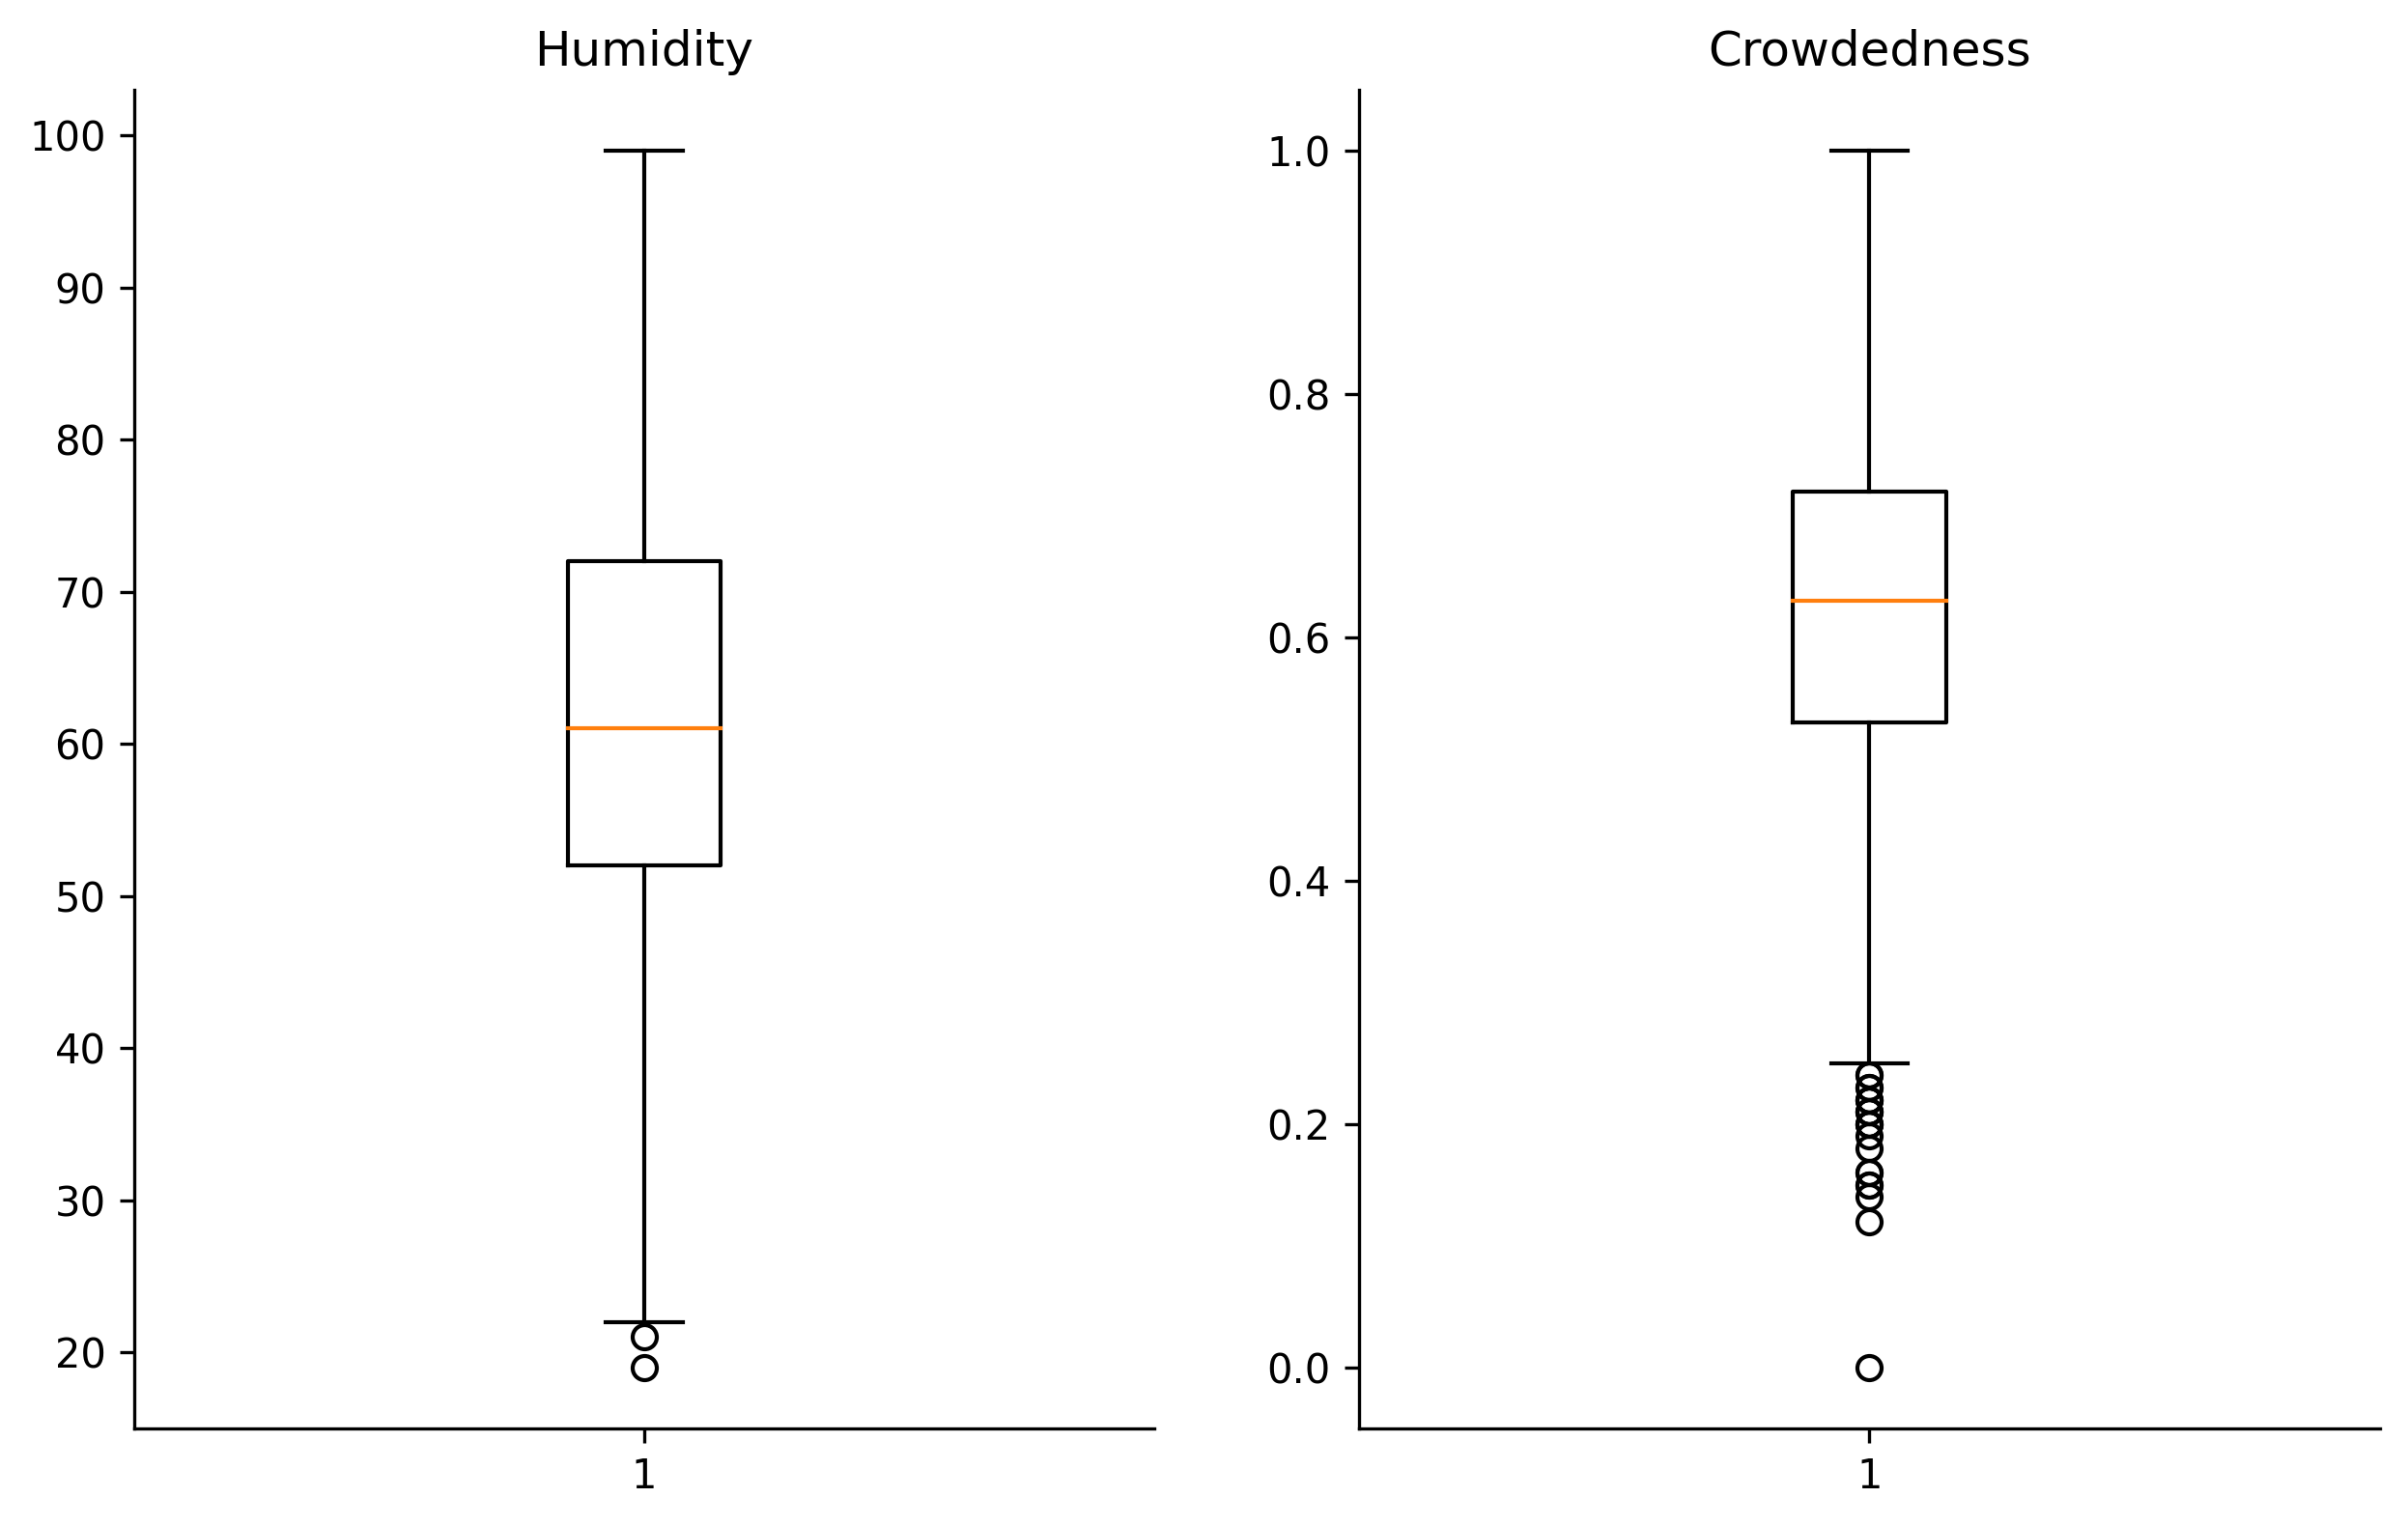

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

for i, col in enumerate(['Humidity', 'Crowdedness']):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)

plt.show()

In [ ]:
# Menghapus baris dengan Humidity kurang dari 25 atau Crowdedness di bawah 0.25
df = df[(df['Humidity'] >= 25) & (df['Crowdedness'] >= 0.25)]

# Setelah operasi ini, 'df' hanya akan berisi baris-baris yang memenuhi kondisi tersebut.


In [ ]:
plt.figure(figsize=(30, 40))
df.boxplot(figsize=(15,10))
plt.title("Boxplots of Features")
plt.xticks(rotation=45)
plt.show()


# **ENCODE**

In [ ]:
df.head()

Date  Weekday Month  Season  Holiday  Temperature  Humidity  Windy  \
0  2021-01-01        4   Jan  Winter        1          3.3      49.0      1   
1  2021-01-02        5   Jan  Winter        0          2.9      53.0      0   
2  2021-01-03        6   Jan  Winter        0          2.3      58.0      0   
3  2021-01-04        0   Jan  Winter        0          3.0      45.0      0   
4  2021-01-05        1   Jan  Winter        0          3.1      31.0      1   

    Outlook  Crowdedness  Many_Players_Playing  Average_PlayTime  
0     sunny         0.73                  True          3.366667  
1     sunny         0.74                  True          3.950000  
2  overcast         0.70                  True          4.600000  
3  overcast         0.61                 False          0.000000  
4     sunny         0.52                  True          2.800000

In [ ]:
# Menggunakan metode value_counts() untuk menghitung variasi dan totalnya dalam kolom "Many_Players_Playing"
play_variety_counts = df['Many_Players_Playing'].value_counts()

# Menampilkan variasi dan totalnya dalam kolom "Many_Players_Playing"
print("Variasi dan Total dalam Kolom 'Many_Players_Playing':")
print(play_variety_counts)

Variasi dan Total dalam Kolom 'Many_Players_Playing':
True     735
False    334
Name: Many_Players_Playing, dtype: int64


In [ ]:
# One-Hot Encoding on Many_Players_Playing (drop True)
df_play = pd.get_dummies(df['Many_Players_Playing'],prefix='Many_Players_Playing', drop_first=True).astype(int)
pd.concat([df['Many_Players_Playing'],df_play], axis=1)

Many_Players_Playing  Many_Players_Playing_True
0                     True                          1
1                     True                          1
2                     True                          1
3                    False                          0
4                     True                          1
...                    ...                        ...
1090                  True                          1
1091                 False                          0
1092                  True                          1
1093                  True                          1
1094                  True                          1

[1069 rows x 2 columns]

In [ ]:
# Menggunakan metode value_counts() untuk menghitung variasi dan totalnya dalam kolom "Season"
play_variety_counts = df['Season'].value_counts()

# Menampilkan variasi dan totalnya dalam kolom "Season"
print("Variasi dan Total dalam Kolom 'Season':")
print(play_variety_counts)

Variasi dan Total dalam Kolom 'Season':
Spring    277
Summer    266
Autumn    265
Winter    261
Name: Season, dtype: int64


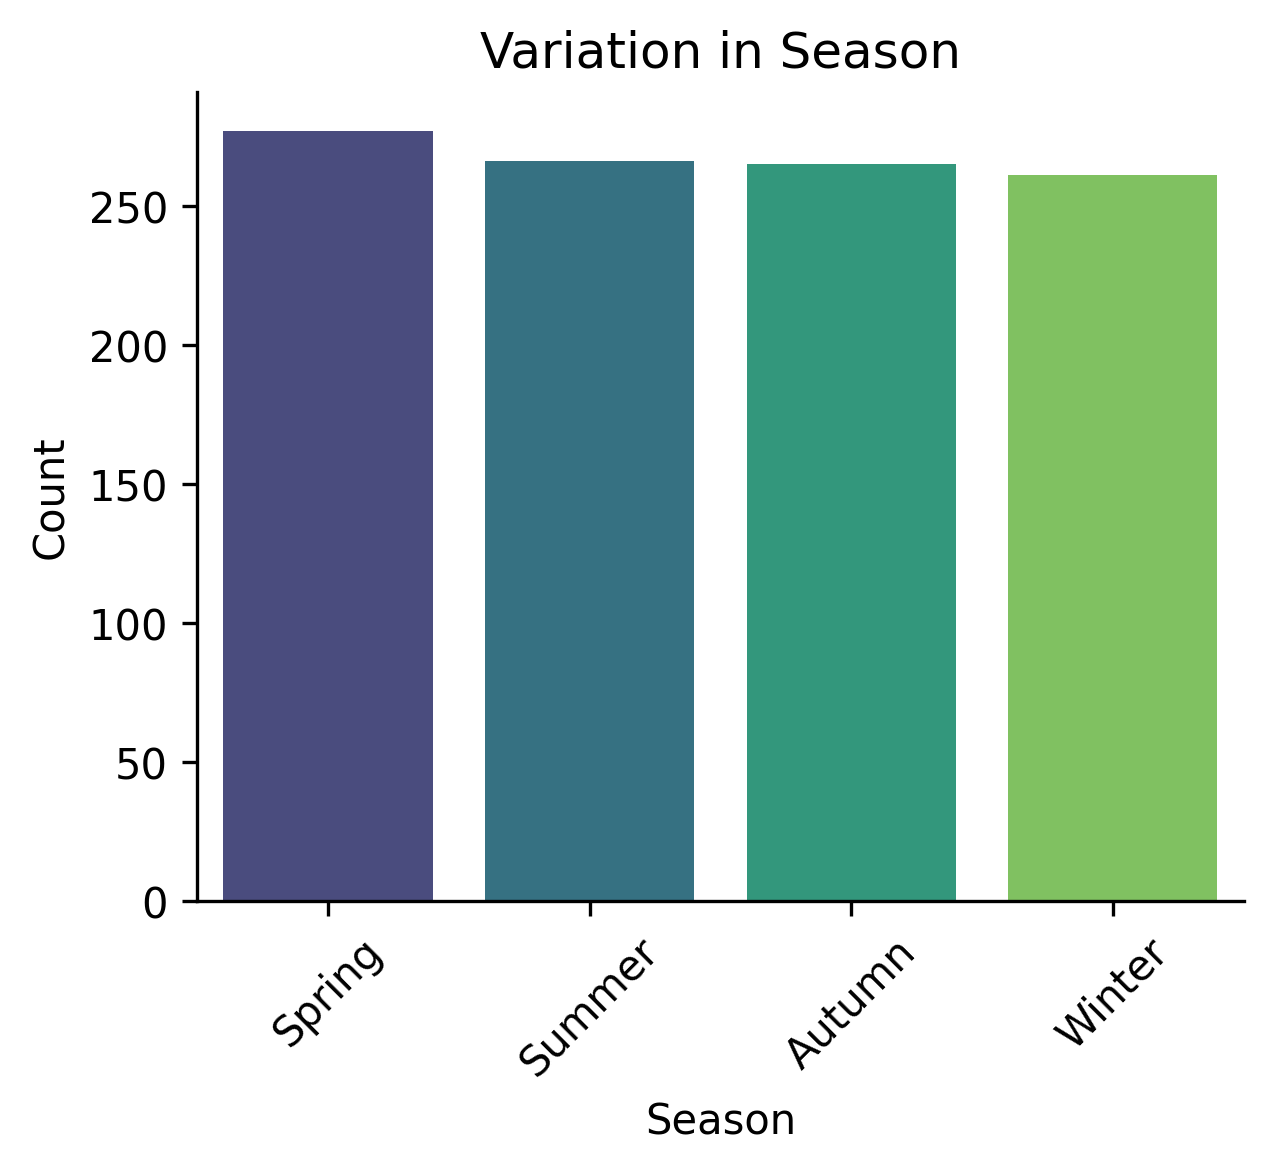

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung jumlah setiap variasi dalam kolom 'Season'
season_counts = df['Season'].value_counts()

# Membuat bar plot
sns.barplot(x=season_counts.index, y=season_counts.values, palette="viridis")

# Memberi label sumbu dan judul
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Variation in Season")

# Menampilkan plot
plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca
plt.show()


In [ ]:
# One-Hot Encoding on Season
df_season = pd.get_dummies(df['Season'], prefix='Season').astype(int)

pd.concat([df['Season'],df_season], axis=1)

Season  Season_Autumn  Season_Spring  Season_Summer  Season_Winter
0     Winter              0              0              0              1
1     Winter              0              0              0              1
2     Winter              0              0              0              1
3     Winter              0              0              0              1
4     Winter              0              0              0              1
...      ...            ...            ...            ...            ...
1090  Winter              0              0              0              1
1091  Winter              0              0              0              1
1092  Winter              0              0              0              1
1093  Winter              0              0              0              1
1094  Winter              0              0              0              1

[1069 rows x 5 columns]

In [ ]:
# Menggunakan metode value_counts() untuk menghitung variasi dan totalnya dalam kolom "Outlook"
play_variety_counts = df['Outlook'].value_counts()

# Menampilkan variasi dan totalnya dalam kolom "Outlook"
print("Variasi dan Total dalam Kolom 'Outlook':")
print(play_variety_counts)

Variasi dan Total dalam Kolom 'Outlook':
sunny       463
overcast    376
rainy       180
snow         50
Name: Outlook, dtype: int64


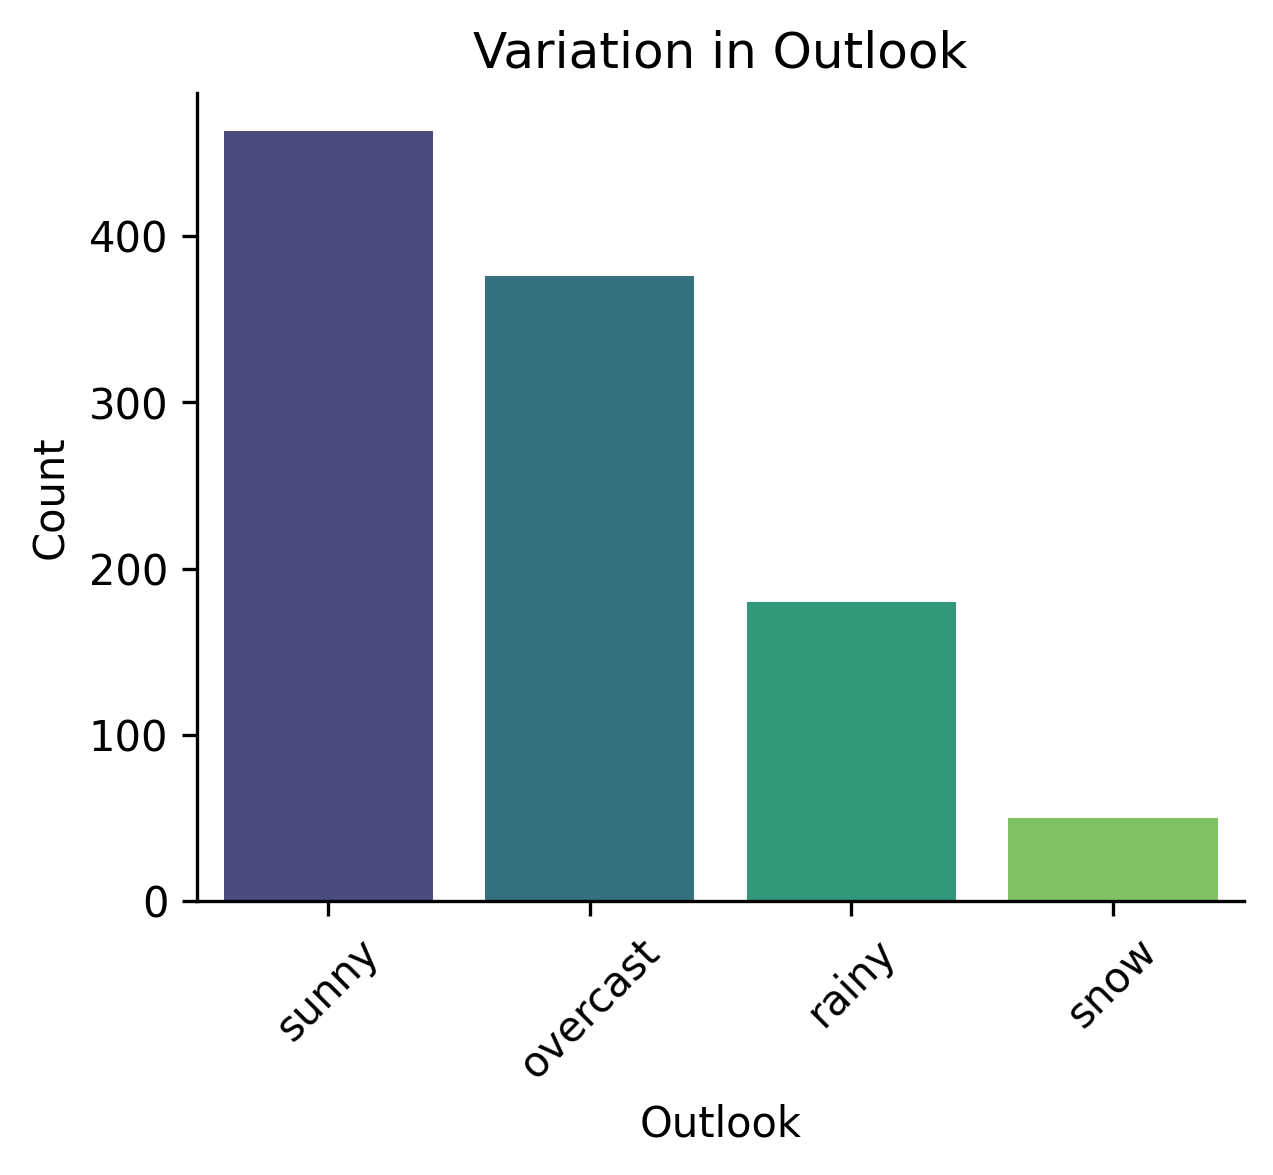

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung jumlah setiap variasi dalam kolom 'Outlook'
season_counts = df['Outlook'].value_counts()

# Membuat bar plot
sns.barplot(x=season_counts.index, y=season_counts.values, palette="viridis")

# Memberi label sumbu dan judul
plt.xlabel("Outlook")
plt.ylabel("Count")
plt.title("Variation in Outlook")

# Menampilkan plot
plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca
plt.show()


In [ ]:
# One-Hot Encoding on Outlook
df_outlook_one_hot = pd.get_dummies(df['Outlook'], prefix='Outlook').astype(int)

pd.concat([df['Outlook'],df_outlook_one_hot], axis=1)

Outlook  Outlook_overcast  Outlook_rainy  Outlook_snow  Outlook_sunny
0        sunny                 0              0             0              1
1        sunny                 0              0             0              1
2     overcast                 1              0             0              0
3     overcast                 1              0             0              0
4        sunny                 0              0             0              1
...        ...               ...            ...           ...            ...
1090     sunny                 0              0             0              1
1091  overcast                 1              0             0              0
1092  overcast                 1              0             0              0
1093  overcast                 1              0             0              0
1094      snow                 0              0             1              0

[1069 rows x 5 columns]

In [ ]:
# Menggunakan metode value_counts() untuk menghitung variasi dan totalnya dalam kolom "Month"
play_variety_counts = df['Month'].value_counts()

# Menampilkan variasi dan totalnya dalam kolom "Month"
print("Variasi dan Total dalam Kolom 'Month':")
print(play_variety_counts)

Variasi dan Total dalam Kolom 'Month':
May    93
Oct    93
Mar    92
Dec    91
Apr    90
Nov    90
Jan    89
Sep    89
Jun    88
Jul    88
Aug    84
Feb    82
Name: Month, dtype: int64


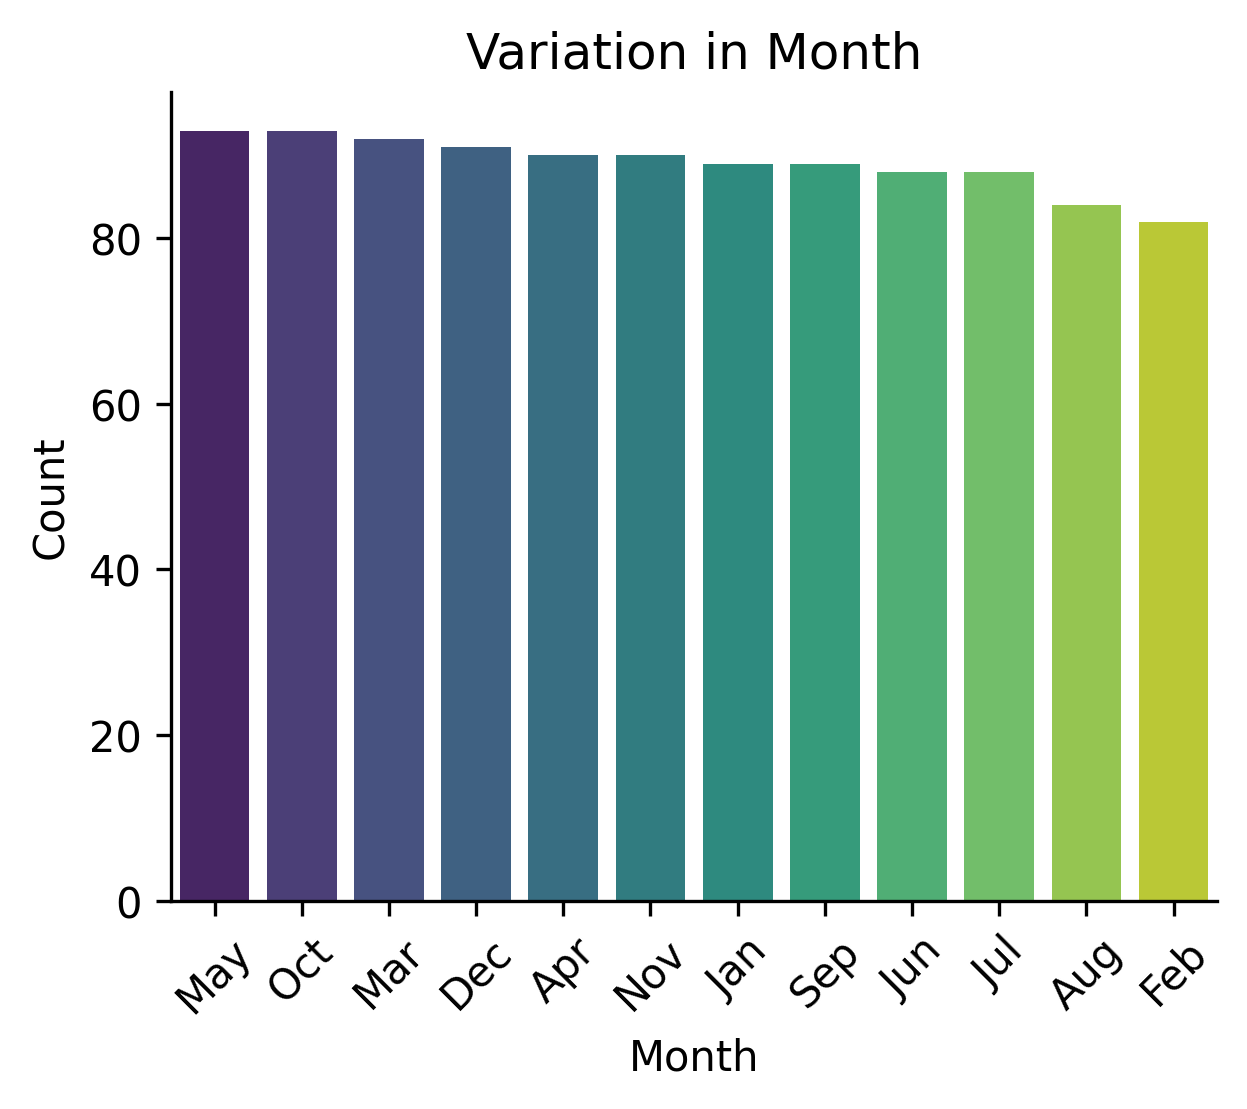

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung jumlah setiap variasi dalam kolom 'Month'
season_counts = df['Month'].value_counts()

# Membuat bar plot
sns.barplot(x=season_counts.index, y=season_counts.values, palette="viridis")

# Memberi label sumbu dan judul
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Variation in Month")

# Menampilkan plot
plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca
plt.show()


In [ ]:
# Membuat dictionary yang memetakan nama bulan ke angka
month_mapping = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

# Menggunakan map() untuk melakukan pemetaan dari nama bulan ke angka
df['Month_map'] = df['Month'].map(month_mapping)

In [ ]:
# Menggunakan metode value_counts() untuk menghitung variasi dan totalnya dalam kolom "Outlook"
#play_variety_counts = df['Humidity_cat'].value_counts()

# Menampilkan variasi dan totalnya dalam kolom "Outlook"
#print("Variasi dan Total dalam Kolom 'Outlook':")
#print(play_variety_counts)

In [ ]:
df.head(2)

Date  Weekday Month  Season  Holiday  Temperature  Humidity  Windy  \
0  2021-01-01        4   Jan  Winter        1          3.3      49.0      1   
1  2021-01-02        5   Jan  Winter        0          2.9      53.0      0   

  Outlook  Crowdedness  Many_Players_Playing  Average_PlayTime  Month_map  
0   sunny         0.73                  True          3.366667          1  
1   sunny         0.74                  True          3.950000          1

In [ ]:
df_combined = pd.concat([df,df_outlook_one_hot,df_season,df_play], axis=1)
df1 = df_combined.copy().drop(['Month','Season','Many_Players_Playing'], axis=1)
df1.set_index('Date', inplace=True)  # Mengatur ulang kolom Date sebagai indeks
df1.rename(columns={'Many_Players_Playing_True': 'Play', 'Average_PlayTime': 'PlayTime'}, inplace=True)  # Mengganti nama kolom
df1['PlayTime'] = df1['PlayTime'].round(2)
df1.head()

Weekday  Holiday  Temperature  Humidity  Windy   Outlook  \
Date                                                                   
2021-01-01        4        1          3.3      49.0      1     sunny   
2021-01-02        5        0          2.9      53.0      0     sunny   
2021-01-03        6        0          2.3      58.0      0  overcast   
2021-01-04        0        0          3.0      45.0      0  overcast   
2021-01-05        1        0          3.1      31.0      1     sunny   

            Crowdedness  PlayTime  Month_map  Outlook_overcast  Outlook_rainy  \
Date                                                                            
2021-01-01         0.73      3.37          1                 0              0   
2021-01-02         0.74      3.95          1                 0              0   
2021-01-03         0.70      4.60          1                 1              0   
2021-01-04         0.61      0.00          1                 1              0   
2021-01-05         0.52      2.80          1                 0              0   

            Outlook_snow  Outlook_sunny  Season_Autumn  Season_Spring  \
Date                                                                    
2021-01-01             0              1              0              0   
2021-01-02             0              1              0              0   
2021-01-03             0              0              0              0   
2021-01-04             0              0              0              0   
2021-01-05             0              1              0              0   

            Season_Summer  Season_Winter  Play  
Date                                            
2021-01-01              0              1     1  
2021-01-02              0              1     1  
2021-01-03              0              1     1  
2021-01-04              0              1     0  
2021-01-05              0              1     1

In [ ]:
df1.columns

Index(['Weekday', 'Holiday', 'Temperature', 'Humidity', 'Windy', 'Outlook',
       'Crowdedness', 'PlayTime', 'Month_map', 'Outlook_overcast',
       'Outlook_rainy', 'Outlook_snow', 'Outlook_sunny', 'Season_Autumn',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'Play'],
      dtype='object')

# **BINNING**

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
import pandas as pd

temp_discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')

df1['Crowdedness_bins'] = temp_discretizer.fit_transform(df1[['Crowdedness']]).astype(int)

print(df1[['Crowdedness', 'Crowdedness_bins']])


            Crowdedness  Crowdedness_bins
Date                                     
2021-01-01         0.73                 3
2021-01-02         0.74                 3
2021-01-03         0.70                 2
2021-01-04         0.61                 1
2021-01-05         0.52                 0
...                 ...               ...
2023-12-27         0.60                 1
2023-12-28         0.60                 1
2023-12-29         0.67                 2
2023-12-30         0.68                 2
2023-12-31         0.57                 1

[1069 rows x 2 columns]


In [ ]:
# Menghitung kuartil
quartile_1 = df['Crowdedness'].quantile(0.25)
quartile_2 = df['Crowdedness'].quantile(0.50)  # Ini adalah median (quartile ke-2)
quartile_3 = df['Crowdedness'].quantile(0.75)

# Menampilkan hasil
print("Kuartil 1:", quartile_1)
print("Kuartil 2 (Median):", quartile_2)
print("Kuartil 3:", quartile_3)


Kuartil 1: 0.54
Kuartil 2 (Median): 0.64
Kuartil 3: 0.73


In [ ]:
import category_encoders as ce
import pandas as pd

te = ce.TargetEncoder()

df1['Outlook_Target'] = te.fit_transform(df1['Outlook'], df1['Crowdedness_bins']).round(2)
df1[['Outlook_Target']]

Outlook_Target
Date                      
2021-01-01            1.96
2021-01-02            1.96
2021-01-03            1.42
2021-01-04            1.42
2021-01-05            1.96
...                    ...
2023-12-27            1.96
2023-12-28            1.42
2023-12-29            1.42
2023-12-30            1.42
2023-12-31            0.22

[1069 rows x 1 columns]

In [ ]:
df1[['Outlook_Target']]

Outlook_Target
Date                      
2021-01-01            1.96
2021-01-02            1.96
2021-01-03            1.42
2021-01-04            1.42
2021-01-05            1.96
...                    ...
2023-12-27            1.96
2023-12-28            1.42
2023-12-29            1.42
2023-12-30            1.42
2023-12-31            0.22

[1069 rows x 1 columns]

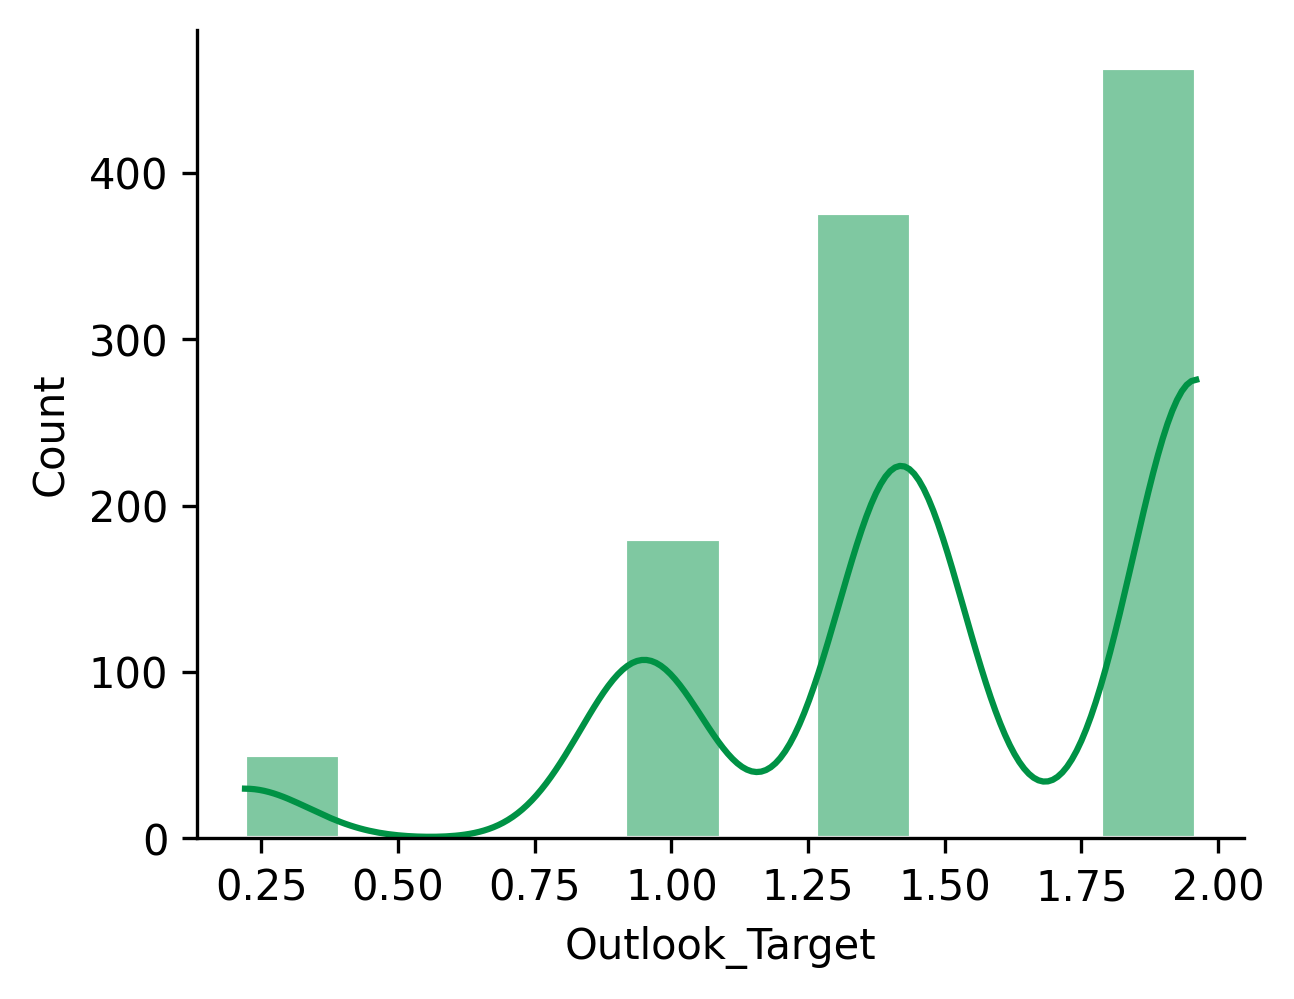

In [ ]:
sns.histplot(df1['Outlook_Target'], bins=10, edgecolor='white', kde=True, color="#009245")
plt.show()

In [ ]:
#bins = [0, 3, 6, 9, 12]
#labels = ['1', '2', '3', '4'] # Quarter 1-4
#df1['Month_bins'] = pd.cut(df1['Month_map'], bins=bins, labels=labels)
#df1['Month_bins'] = df1['Month_bins'].astype(int)
#df1[['Month_map','Month_bins']]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1069 entries, 2021-01-01 to 2023-12-31
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Weekday           1069 non-null   int64  
 1   Holiday           1069 non-null   int64  
 2   Temperature       1069 non-null   float64
 3   Humidity          1069 non-null   float64
 4   Windy             1069 non-null   int64  
 5   Outlook           1069 non-null   object 
 6   Crowdedness       1069 non-null   float64
 7   PlayTime          1069 non-null   float64
 8   Month_map         1069 non-null   int64  
 9   Outlook_overcast  1069 non-null   int64  
 10  Outlook_rainy     1069 non-null   int64  
 11  Outlook_snow      1069 non-null   int64  
 12  Outlook_sunny     1069 non-null   int64  
 13  Season_Autumn     1069 non-null   int64  
 14  Season_Spring     1069 non-null   int64  
 15  Season_Summer     1069 non-null   int64  
 16  Season_Winter     1069 non-null 

In [ ]:
df1 = df1.drop('Crowdedness_bins', axis=1)

In [ ]:
df1['Play'] = df1.pop('Play')

# **SCALING**

In [ ]:
# Apply Standard Scaling to Temperature
#from sklearn.preprocessing import StandardScaler

#std_scaler = StandardScaler()
#df1['Temperature_Standard'] = std_scaler.fit_transform(df1[['Temperature']]).round(2)

#df1[['Temperature','Temperature_Standard']]

In [ ]:
# Apply Robust Scaling to Humidity
#from sklearn.preprocessing import RobustScaler
#robust_scaler = RobustScaler()
#df1['Humidity_Robust'] = robust_scaler.fit_transform(df1[['Humidity']]).round(2)

#df1[['Humidity', 'Humidity_Robust']]

# **Corr**

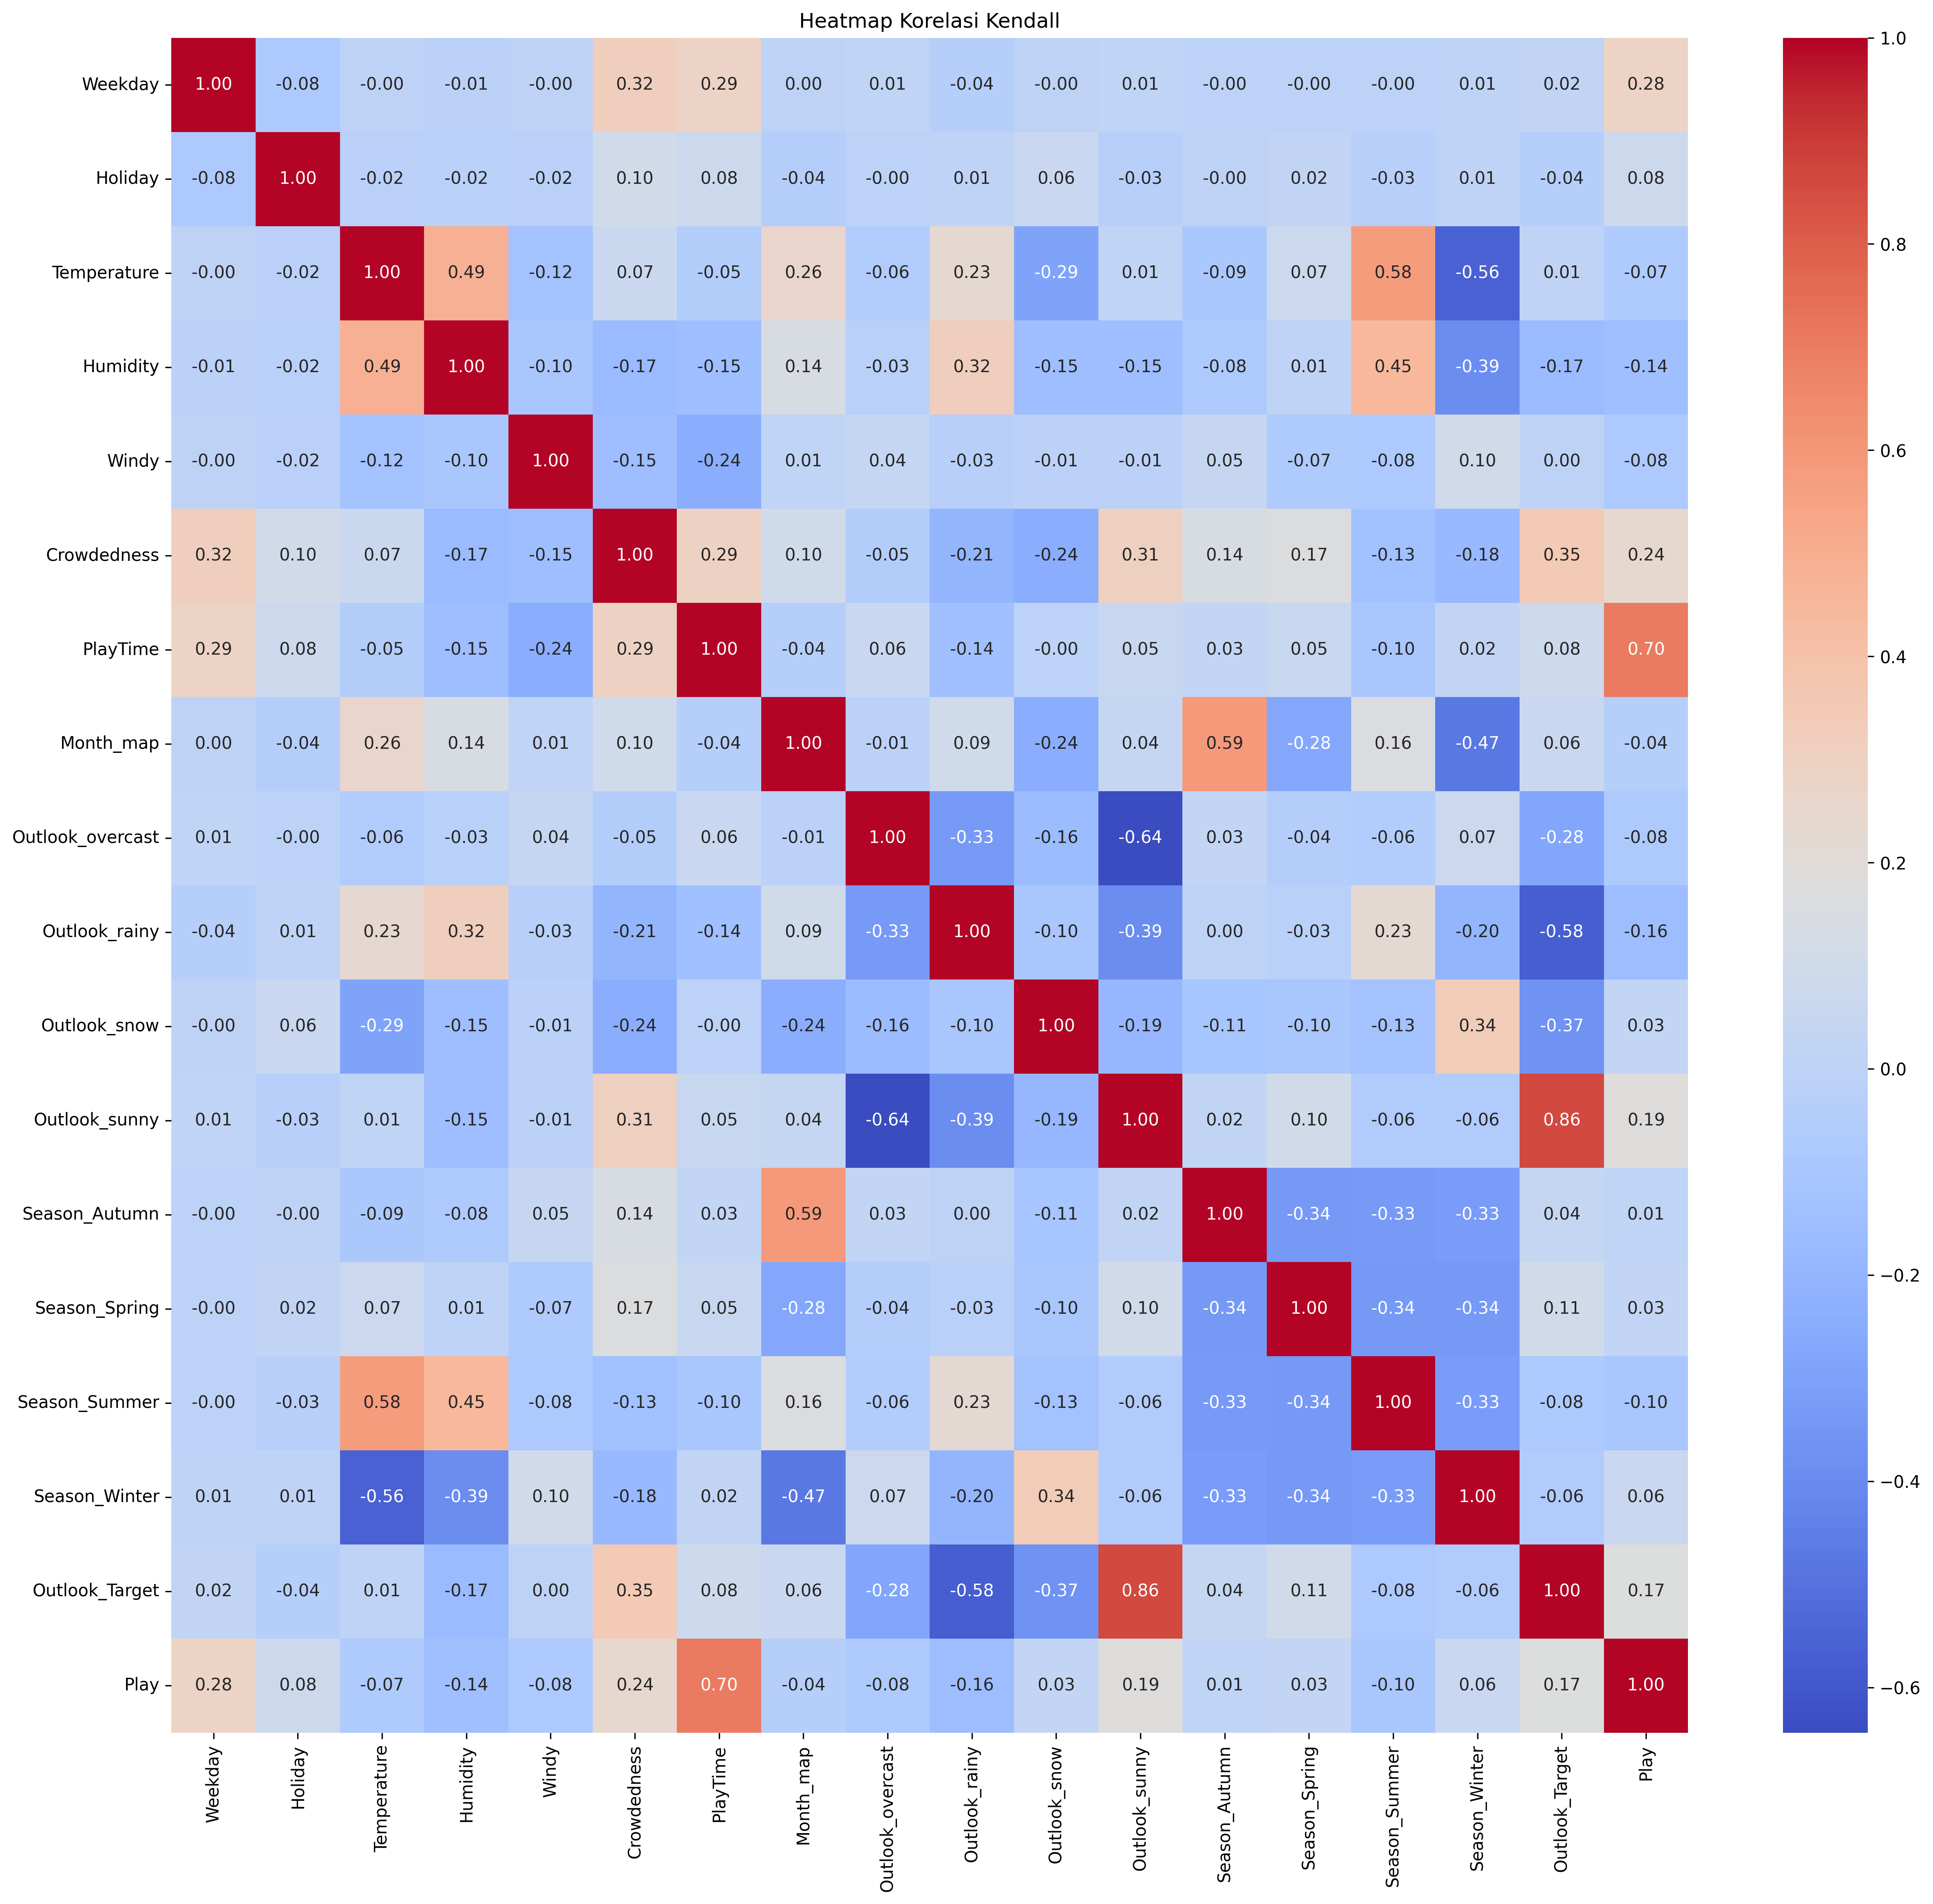

In [ ]:
# Menghitung matriks korelasi
correlation_matrix = df1.corr(method='kendall')

# Membuat heatmap korelasi
plt.figure(figsize=(20, 18))  # Menyesuaikan ukuran gambar sesuai keinginan Anda
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Kendall")
plt.show()

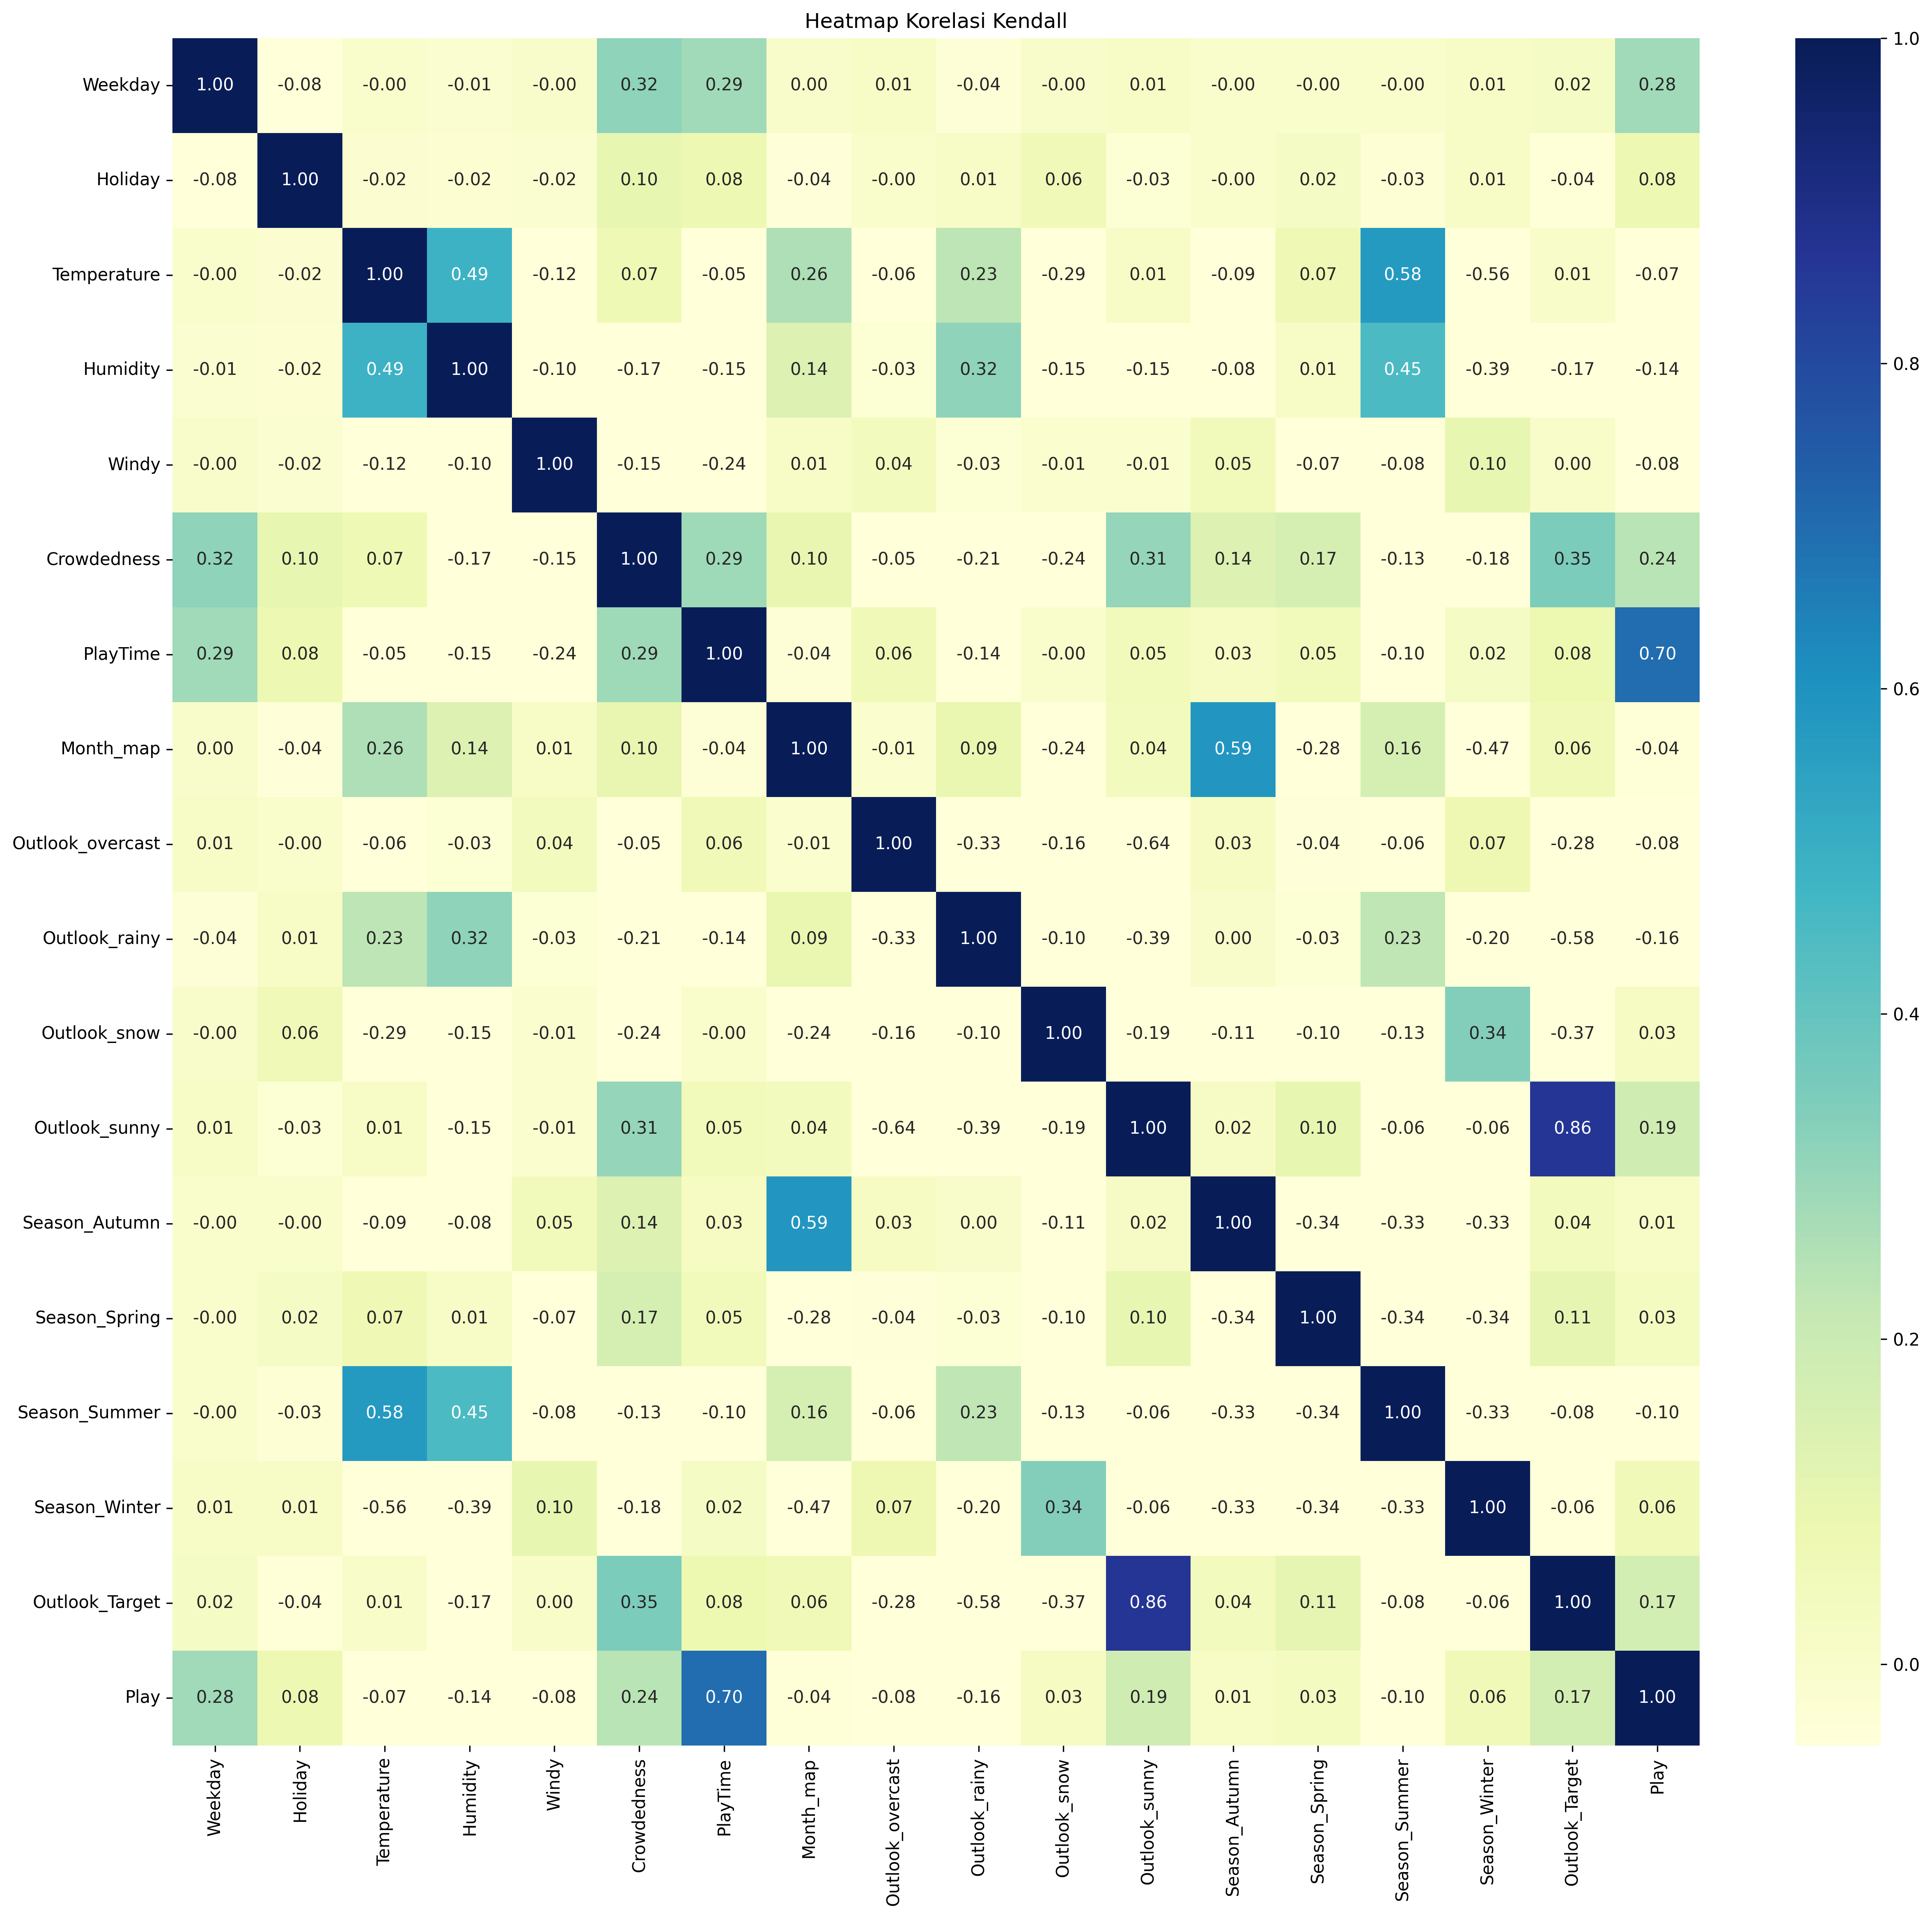

In [ ]:
# Menghitung matriks korelasi
correlation_matrix = df1.corr(method='kendall')

# Membuat heatmap korelasi
plt.figure(figsize=(20, 18))  # Menyesuaikan ukuran gambar sesuai keinginan Anda
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", vmin=-0.05, vmax=1.0)
plt.title("Heatmap Korelasi Kendall")
plt.show()


In [ ]:
correlation_matrix_pearson = df1.corr()

# Matriks korelasi Kendall
correlation_matrix_kendall = df1.corr(method='kendall')

# Matriks korelasi Spearman
correlation_matrix_spearman = df1.corr(method='spearman')

# Plot the heatmaps
plt.figure(figsize=(50, 20))

plt.subplot(1, 3, 1)
sns.heatmap(correlation_matrix_pearson, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Pearson Correlation')

plt.subplot(1, 3, 2)
sns.heatmap(correlation_matrix_kendall, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Kendall Correlation')

plt.subplot(1, 3, 3)
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Spearman Correlation')

plt.tight_layout()
plt.show()

In [ ]:
df1.columns

Index(['Weekday', 'Holiday', 'Temperature', 'Humidity', 'Windy', 'Outlook',
       'Crowdedness', 'PlayTime', 'Month_map', 'Outlook_overcast',
       'Outlook_rainy', 'Outlook_snow', 'Outlook_sunny', 'Season_Autumn',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'Outlook_Target',
       'Play'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression

# Pisahkan fitur dan target
X = df1.drop(['Play', 'PlayTime','Outlook'], axis=1)  # Fitur
y = df1['Play']  # Target

# Inisialisasi model Regresi Linier
model = LinearRegression()

# Latih model pada data
model.fit(X, y)

# Ambil koefisien untuk setiap fitur
feature_importances = model.coef_

# Menampilkan hasil
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)

print(feature_importance_df)


             Feature  Coefficient
1            Holiday     0.234685
10     Outlook_sunny     0.081370
0            Weekday     0.074582
5        Crowdedness     0.065321
9       Outlook_snow     0.051181
11     Season_Autumn     0.031841
14     Season_Winter     0.029114
15    Outlook_Target     0.024746
2        Temperature     0.003533
3           Humidity    -0.003047
6          Month_map    -0.005221
12     Season_Spring    -0.010527
7   Outlook_overcast    -0.042715
13     Season_Summer    -0.050427
4              Windy    -0.079712
8      Outlook_rainy    -0.089836


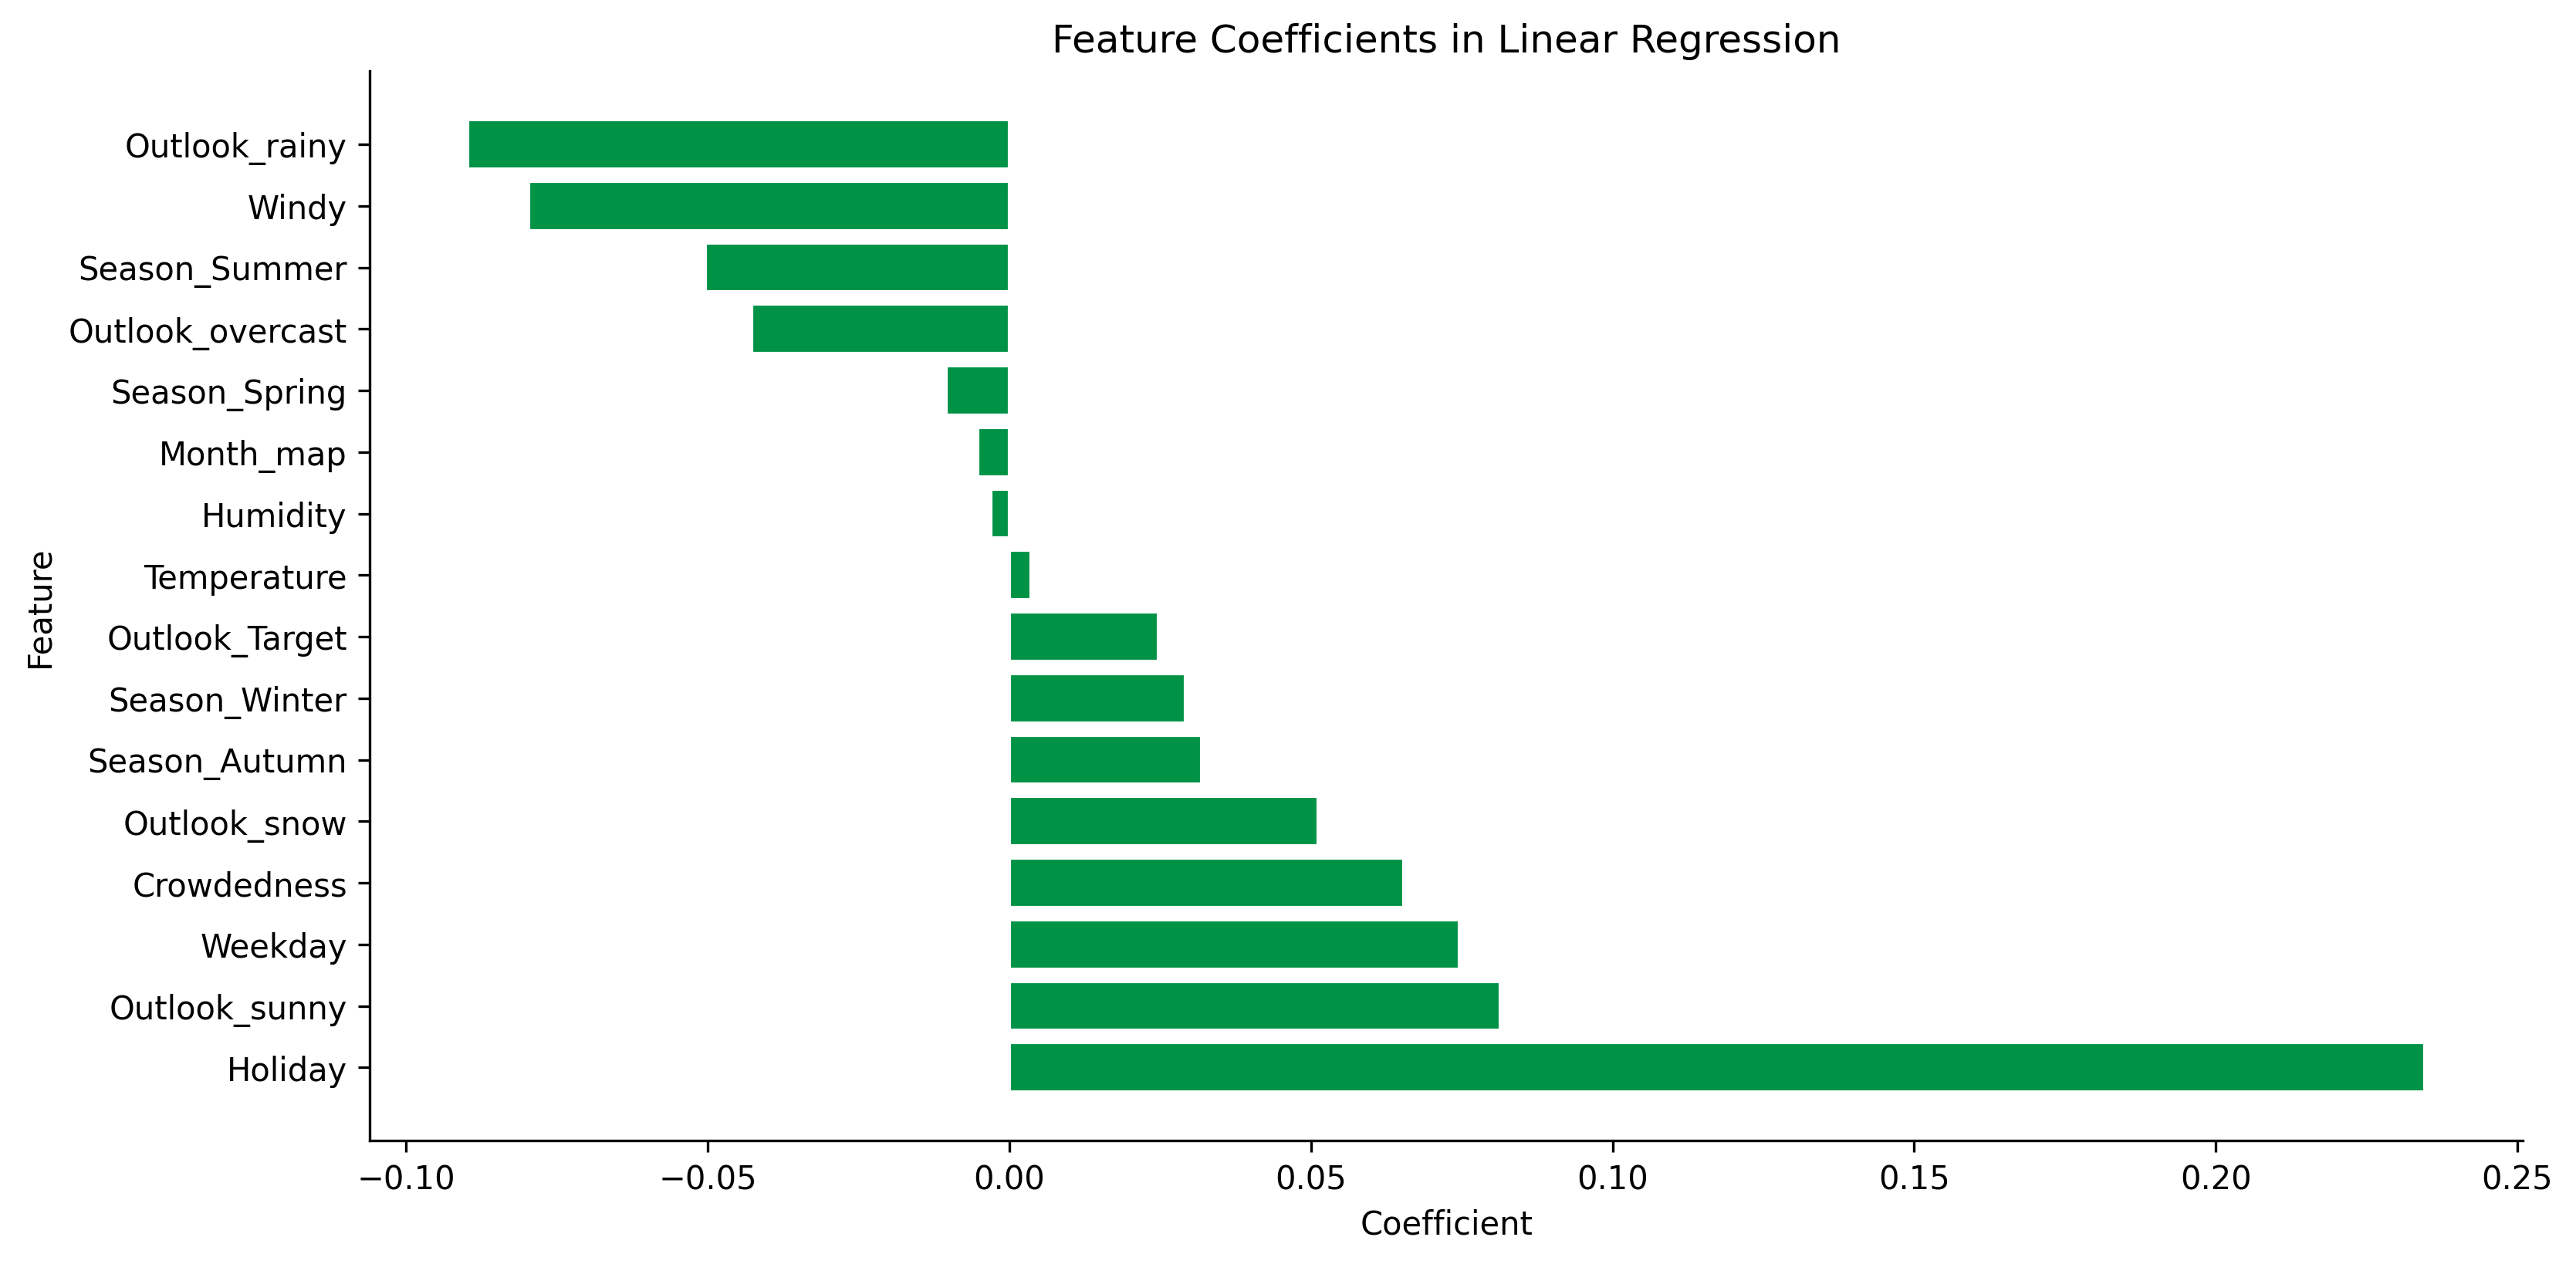

In [ ]:
import matplotlib.pyplot as plt

# Lakukan hal-hal seperti yang telah Anda lakukan untuk mendapatkan koefisien
from sklearn.linear_model import LinearRegression

# Pisahkan fitur dan target
X = df1.drop(['Play', 'PlayTime', 'Outlook'], axis=1)  # Fitur
y = df1['Play']  # Target

# Inisialisasi model Regresi Linier
model = LinearRegression()

# Latih model pada data
model.fit(X, y)

# Ambil koefisien untuk setiap fitur
feature_importances = model.coef_

# Menampilkan hasil
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)

# Buat diagram batang dengan warna #009245
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Coefficient'], edgecolor='white', color='#009245')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Coefficients in Linear Regression')
plt.show()


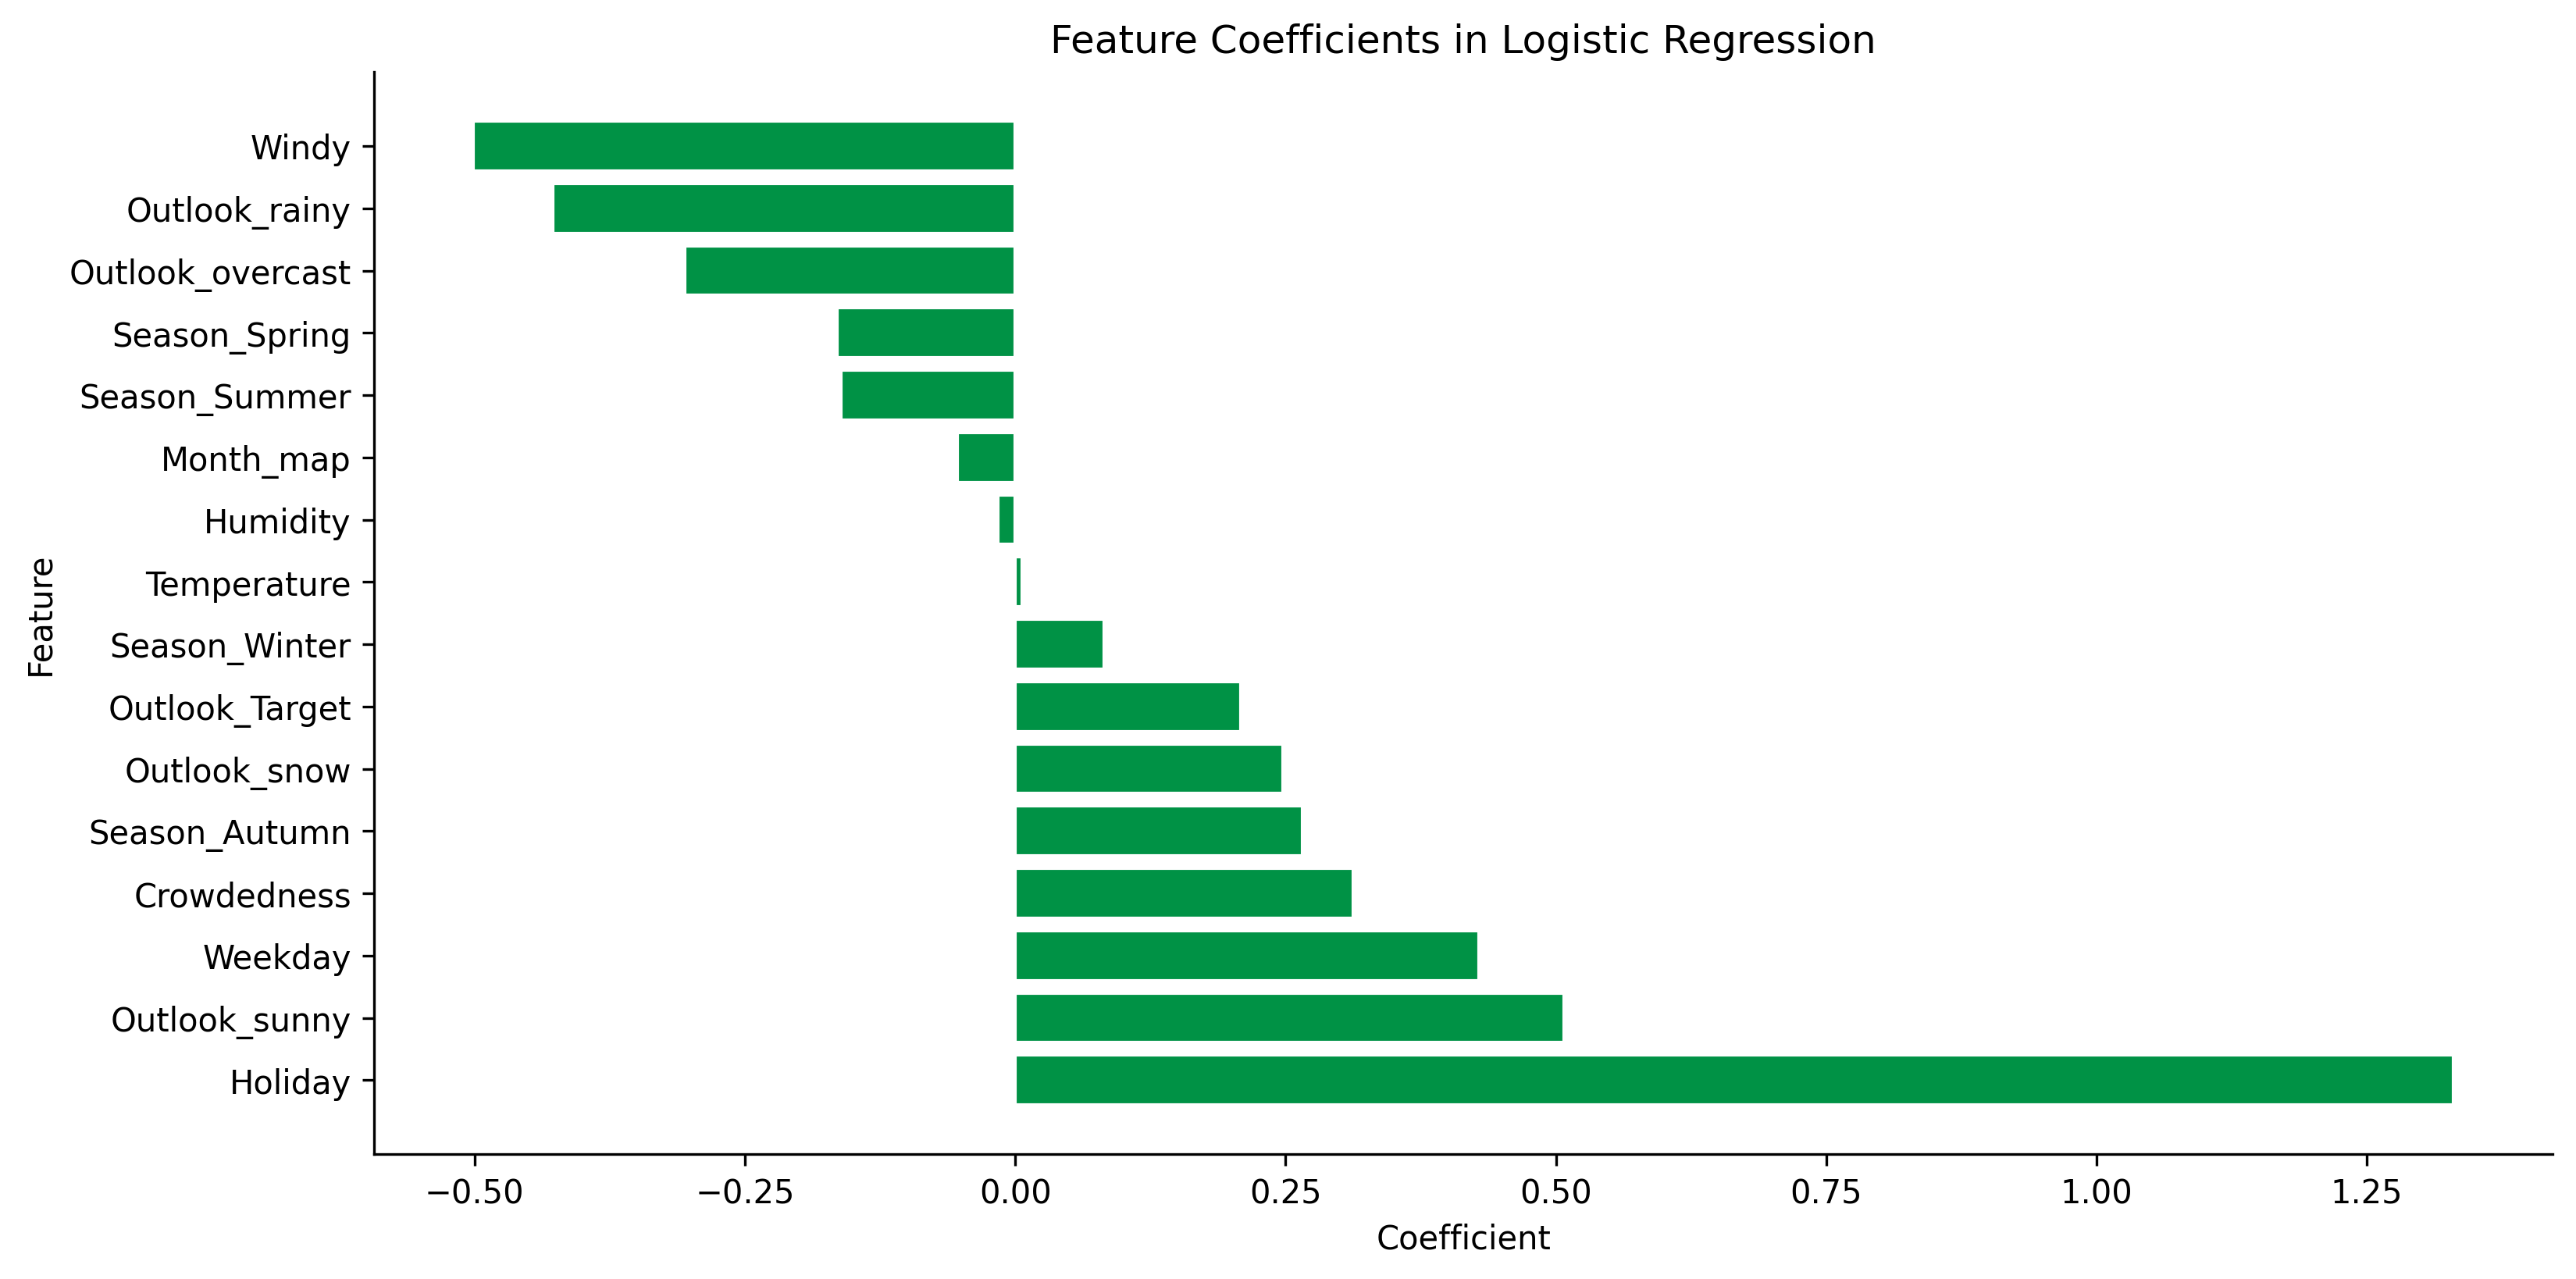

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = df1.drop(['Play', 'PlayTime', 'Outlook'], axis=1)  # Fitur
y = df1['Play']  # Target

# Inisialisasi model Regresi Logistik
model = LogisticRegression(max_iter=1000)

# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Latih model pada data pelatihan
model.fit(X_train, y_train)

# Ambil koefisien untuk setiap fitur
feature_importances = model.coef_[0]

# Menampilkan hasil
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)

# Buat diagram batang dengan warna #009245
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Coefficient'], edgecolor='white', color='#009245')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Coefficients in Logistic Regression')
plt.show()


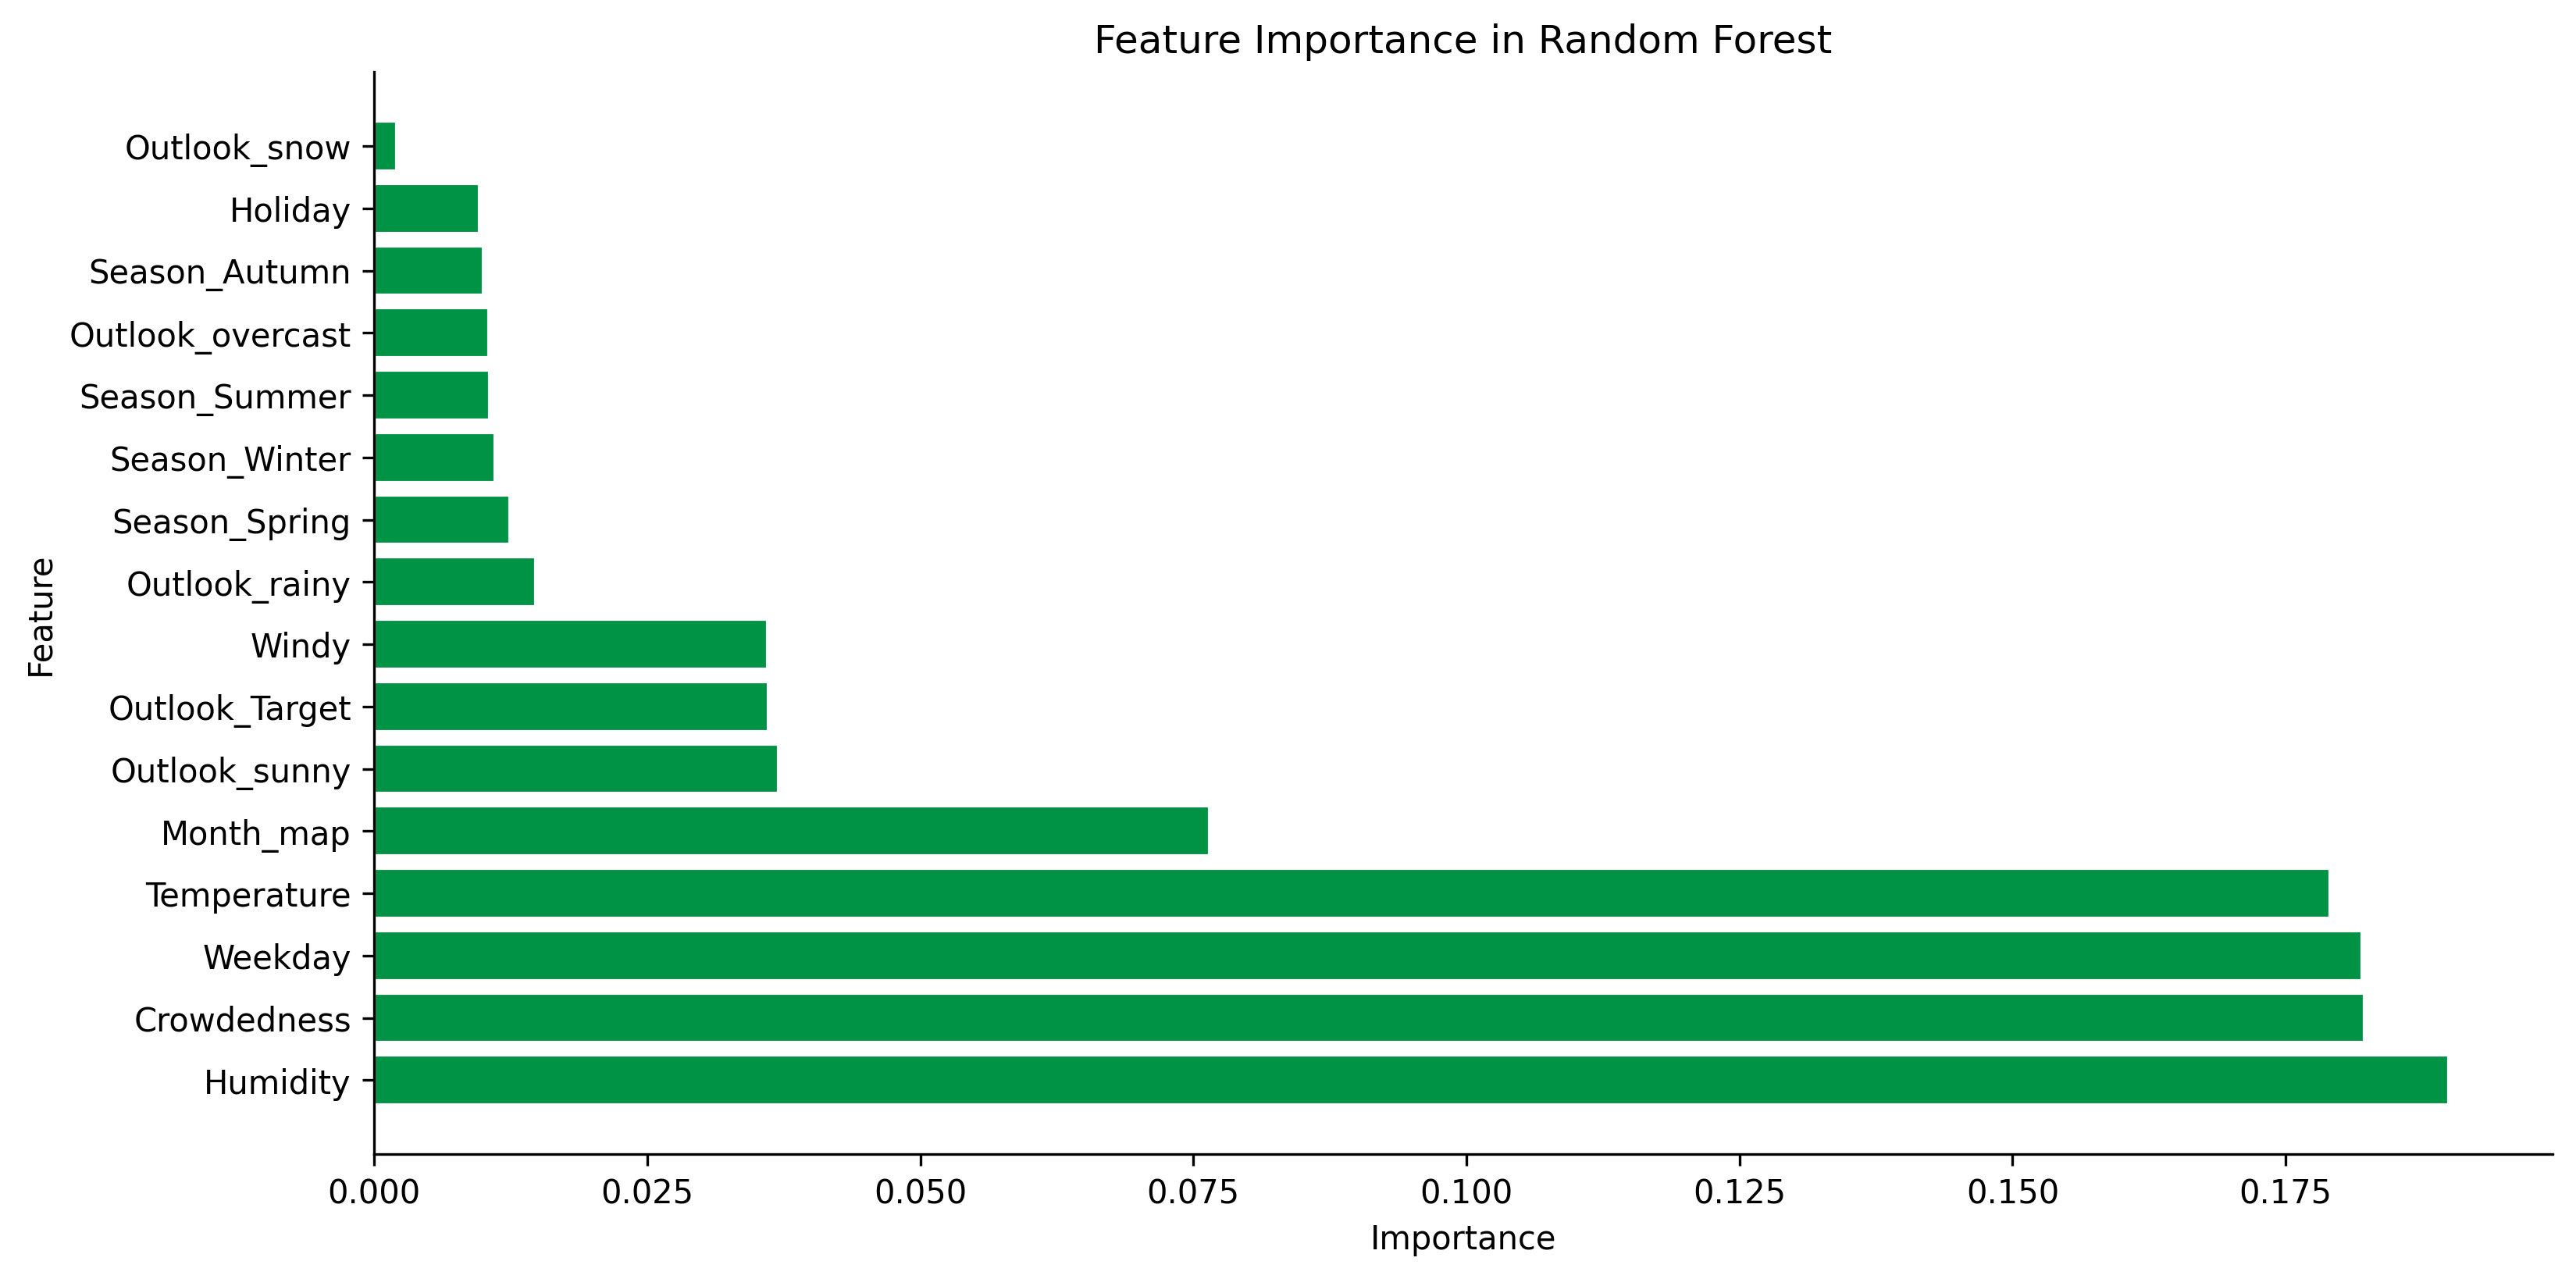

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = df1.drop(['Play', 'PlayTime', 'Outlook'], axis=1)  # Fitur
y = df1['Play']  # Target

# Inisialisasi model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Latih model pada data pelatihan
model.fit(X_train, y_train)

# Ambil perkiraan penting (importance) fitur
feature_importances = model.feature_importances_

# Menampilkan hasil
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Buat diagram batang dengan warna #009245
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], edgecolor='white', color='#009245')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()


In [ ]:
import scipy.stats as stats

# Misalkan Anda memiliki target biner 'Play' dan prediktor numerik 'Temperature'.
target = df1['Play']  # Variabel target biner
prediktor = df1['Humidity']  # Variabel prediktor numerik

# Hitung korelasi biserial
correlation, p_value = stats.pointbiserialr(target, prediktor)

# Tampilkan hasil
print(f"Korelasi Biserial: {correlation}")
print(f"Nilai p-value: {p_value}")


Korelasi Biserial: -0.1514223531415265
Nilai p-value: 6.566897810867028e-07


In [ ]:
# Memisahkan fitur (X) dan target (y)
X = df1[['Weekday', 'Holiday', 'Temperature_Standard','Month_map', 'Windy', 'Humidity','Humidity_Robust', 'Outlook_overcast', 'Outlook_rainy', 'Outlook_snow', 'Outlook_sunny', 'Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'Crowdedness_bins','Outlook_Target','Month_bins']]
y = df1['Play']

# Membuat model Random Forest
model = DecisionTreeClassifier()
model.fit(X, y)

# Mendapatkan fitur penting
feature_importances = model.feature_importances_
features = X.columns

# Mengurutkan fitur berdasarkan tingkat kepentingannya
sorted_idx = feature_importances.argsort()

# Membuat plot fitur penting dengan warna hijau
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center', color='green')
plt.yticks(range(len(sorted_idx), 0, -1), [features[i] for i in sorted_idx])
plt.xlabel('Tingkat Kepentingan Fitur')
plt.ylabel('Fitur')
plt.show()


KeyError: ignored

# **SPLIT DATA**

In [ ]:
df1.columns

Index(['Weekday', 'Holiday', 'Temperature', 'Humidity', 'Windy', 'Outlook',
       'Crowdedness', 'PlayTime', 'Month_map', 'Humidity_cat',
       'Outlook_overcast', 'Outlook_rainy', 'Outlook_snow', 'Outlook_sunny',
       'Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter',
       'Play', 'Crowdedness_bins', 'Outlook_Target', 'Month_bins',
       'Temperature_Standard', 'Humidity_Robust'],
      dtype='object')

In [ ]:
X = df1.drop(['Play', 'PlayTime', 'Outlook'], axis=1)  # Fitur
y = df1['Play']  # Target

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest dengan hyperparameter penuh
rf = RandomForestClassifier(n_estimators=100,  # Jumlah pohon
                           criterion='gini',   # Kriteria split (bisa 'gini' atau 'entropy')
                           max_depth=None,    # Kedalaman maksimum pohon (bisa None atau integer)
                           min_samples_split=2,  # Jumlah sampel minimum yang diperlukan untuk split node
                           min_samples_leaf=1,   # Jumlah sampel minimum di node daun
                           max_features='auto',  # Jumlah fitur yang dipertimbangkan untuk split ('auto', 'sqrt', 'log2', atau integer)
                           bootstrap=True,       # Apakah resampling dengan bootstrap dilakukan
                           random_state=42)      # Seed untuk random state

# Latih model pada data pelatihan
rf.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = rf.predict(X_test)

# Evaluasi model, misalnya dengan menghitung akurasi
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print("Akurasi Model Random Forest: {:.2f}%".format(accuracy * 100))


Akurasi Model Random Forest: 74.30%


In [ ]:
from sklearn.model_selection import GridSearchCV

# Inisialisasi model Random Forest
rf = RandomForestClassifier(random_state=42)

# Definisi hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Inisialisasi GridSearchCV dengan model, parameter grid, dan metrik evaluasi
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Melakukan pencarian grid pada data pelatihan
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
best_params = grid_search.best_params_
print("Parameter Terbaik:")
print(best_params)

# Melatih model dengan parameter terbaik
best_rf = RandomForestClassifier(random_state=42, **best_params)
best_rf.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = best_rf.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Model Random Forest Terbaik: {:.2f}%".format(accuracy * 100))


KeyboardInterrupt: ignored

In [ ]:
# Prediksi Play (Klasifikasi)
# Memisahkan data menjadi data latih dan data uji
X_play_train, X_play_test, y_play_train, y_play_test = train_test_split(X_play, y_play, test_size=0.3, random_state=42)

# Menggunakan Decision Tree Classifier
model_play = DecisionTreeClassifier(random_state=42)
model_play.fit(X_play_train, y_play_train)

# Melakukan prediksi Play
y_play_pred = model_play.predict(X_play_test)

# Evaluasi model untuk prediksi Play
from sklearn.metrics import confusion_matrix, accuracy_score
cm_play = confusion_matrix(y_play_test, y_play_pred)
accuracy_play = accuracy_score(y_play_test, y_play_pred)
print("Confusion Matrix (Play):")
print(cm_play)
print(f"Accuracy (Play): {accuracy_play:.2f}")

Confusion Matrix (Play):
[[ 65  40]
 [ 55 169]]
Accuracy (Play): 0.71


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Menentukan hyperparameters
hyperparameters = {
    'criterion': 'gini',        # Gini impurity sebagai kriteria pemisahan node
    'max_depth': 5,           # Kedalaman maksimum pohon
    'min_samples_split': 10,    # Jumlah minimum sampel yang diperlukan untuk membagi node
    'min_samples_leaf': 1      # Jumlah minimum sampel yang diperlukan di setiap leaf node
}

# Membuat model Decision Tree dengan hyperparameters
model_play = DecisionTreeClassifier(random_state=1, **hyperparameters)

# Melatih model dengan data latih
model_play.fit(X_play_train, y_play_train)

# Melakukan prediksi Play
y_play_pred = model_play.predict(X_play_test)

# Evaluasi model untuk prediksi Play
from sklearn.metrics import confusion_matrix, accuracy_score
cm_play = confusion_matrix(y_play_test, y_play_pred)
accuracy_play = accuracy_score(y_play_test, y_play_pred)
print("Confusion Matrix (Play):")
print(cm_play)
print(f"Accuracy (Play): {accuracy_play:.2f}")


Confusion Matrix (Play):
[[ 68  37]
 [ 35 189]]
Accuracy (Play): 0.78


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Menentukan hyperparameters
hyperparameters = {
    'criterion': 'gini',
    'max_depth': 5,
    'min_samples_split': 10,
    'min_samples_leaf': 1
}

# Inisialisasi variabel untuk menyimpan hasil
best_random_state = None
best_accuracy = 0

# Coba semua nilai random_state dari 0 hingga 500
for random_state in range(1000):
    # Membuat model Decision Tree dengan hyperparameters
    model_play = DecisionTreeClassifier(random_state=random_state, **hyperparameters)

    # Melatih model dengan data latih
    model_play.fit(X_play_train, y_play_train)

    # Melakukan prediksi Play
    y_play_pred = model_play.predict(X_play_test)

    # Evaluasi model untuk prediksi Play
    accuracy_play = accuracy_score(y_play_test, y_play_pred)

    # Cek apakah akurasi lebih baik daripada yang sebelumnya
    if accuracy_play > best_accuracy:
        best_accuracy = accuracy_play
        best_random_state = random_state

# Hasil terbaik
cm_play = confusion_matrix(y_play_test, y_play_pred)
print("Confusion Matrix (Play):")
print(cm_play)

print(f"Best random_state: {best_random_state}")
print(f"Best Accuracy: {best_accuracy:.2f}")


Confusion Matrix (Play):
[[ 68  37]
 [ 35 189]]
Best random_state: 0
Best Accuracy: 0.78


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Inisialisasi model Decision Tree
model = DecisionTreeClassifier()

# Menentukan hyperparameter yang ingin diuji
param_grid = {
    'criterion': ['gini', 'entropy'],  # Jenis kriteria pemisahan (gini atau entropy)
    'max_depth': [None, 5, 10, 15,20],  # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10,20],  # Jumlah sampel minimum untuk membagi node internal
    'min_samples_leaf': [1, 2, 4,10]  # Jumlah sampel minimum di leaf node
}

# Inisialisasi GridSearchCV untuk pencarian hyperparameter terbaik
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Melatih model dengan berbagai kombinasi hyperparameter
grid_search.fit(X_play_train, y_play_train)

# Mendapatkan hyperparameter terbaik
best_params = grid_search.best_params_
print('Hyperparameter Terbaik:', best_params)

# Melatih model dengan hyperparameter terbaik
best_model = DecisionTreeClassifier(**best_params)
best_model.fit(X_play_train, y_play_train)

# Prediksi target untuk data uji dengan model terbaik
y_pred = best_model.predict(X_play_test)

# Hitung akurasi model
accuracy = accuracy_score(y_play_test, y_play_pred)
print(f'Akurasi Model Terbaik: {accuracy:.2f}')


Hyperparameter Terbaik: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 20}
Akurasi Model Terbaik: 0.78


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

best_random_state = None
best_accuracy = 0

for random_state in range(0, 500):  # Coba berbagai nilai random_state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_random_state = random_state

print(f"Best random_state: {best_random_state}")
print(f"Best accuracy: {best_accuracy:.2f}")

NameError: ignored

# **EKSPOR**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
dfsv = df1.copy()
dfsv.to_csv('/content/drive/MyDrive/Model/playgolf2.csv', index=False)